# 3.1　无监督学习的类型
本章将研究两种类型的无监督学习：数据集变换与聚类。

数据集的无监督变换（unsupervised transformation）是创建数据新的表示的算法
降维 构成提取 聚类算法
# 3.2　无监督学习的挑战
评估

# 3.3　预处理与缩放
上一章我们学到，一些算法（如神经网络和 SVM）对数据缩放非常敏感。因此，通常的
做法是对特征进行调节，使数据表示更适合于这些算法。通常来说，这是对数据的一种简
单的按特征的缩放和移动。下面的代码（图 3-1）给出了一个简单的例子：

# 3.3.1　不同类型的预处理
standardScalar
RobustScaler:忽略异常值
MinMaxScaler
Normalizer： 只有数据的方向或者角度是重要的，而与长度无关

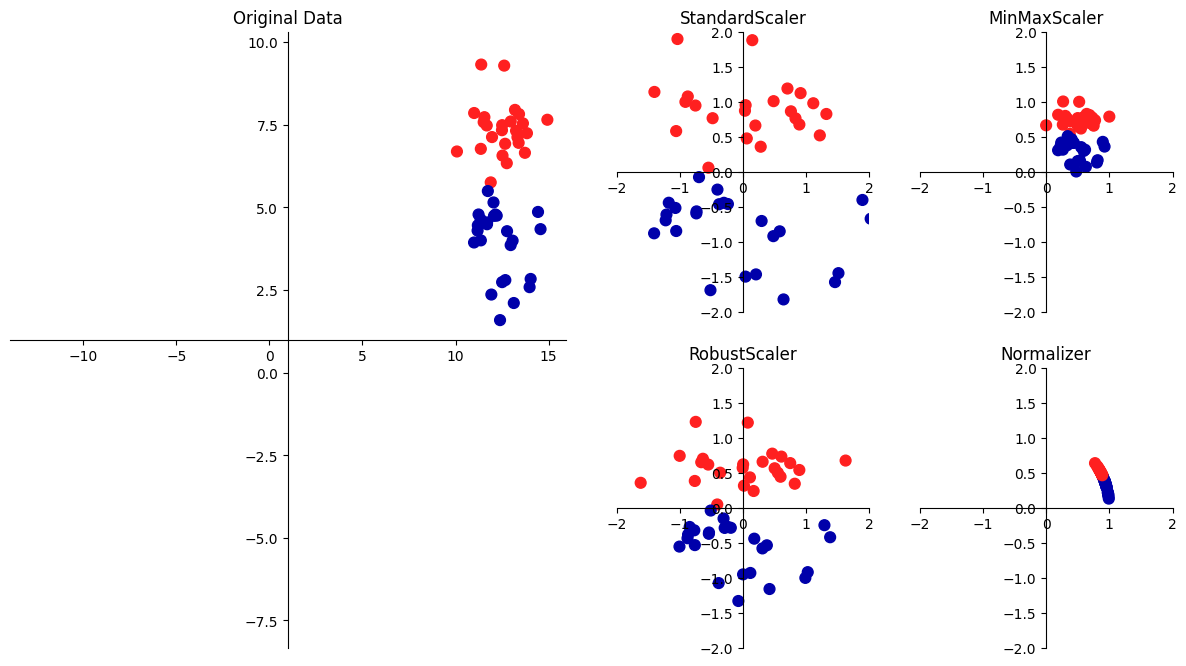

In [168]:
import mglearn

mglearn.plots.plot_scaling()

 ## 3.3.2　应用数据变换

前面我们已经看到不同类型的变换的作用，下面利用 scikit-learn 来应用这些变换。我们
将使用第 2 章见过的 cancer 数据集。
通常在应用监督学习算法之前使用预处理方法（比如缩放）。
举个例子，比如我们想要将核 SVM（SVC）应用在 cancer 数据集上，
并使用MinMaxScaler 来预处理数据。

首先加载数据集并将其分为训练集和测试集（我们需要分开的训练集和数据集来对预处理后构建的监督模型进行评估）：

In [169]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target,
                                                    random_state=1)
print(X_train.shape)
print(X_test.shape)

(426, 30)
(143, 30)


这个数据集包含 569 个数据点，每个数据点由 30 个测量值表示。我们将数据
集分成包含 426 个样本的训练集与包含 143 个样本的测试集。

首先导入实现预处理的类，然后将其实例化：
使用 fit 方法拟合缩放器（scaler），并将其应用于训练数据。
与第 2 章中的分类器和回归器
（regressor）不同，在对缩放器调用 fit 时只提供了 X_train，而不用 y_train：

In [170]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X_train)


MinMaxScaler()

为了应用刚刚学习的变换（即对训练数据进行实际缩放），我们使用缩放器的 transform
方法。在 scikit-learn 中，每当模型返回数据的一种新表示时，都可以使用 transform
方法：

In [171]:
# 变换数据
X_train_scaled = scaler.transform(X_train)
# 在缩放之前和之后分别打印数据集属性
print("transformed shape: {}".format(X_train_scaled.shape))
print("per-feature minimum before scaling:\n {}".format(X_train.min(axis=0)))
print("per-feature maximum before scaling:\n {}".format(X_train.max(axis=0)))
print("per-feature minimum after scaling:\n {}".format(
    X_train_scaled.min(axis=0)))
print("per-feature maximum after scaling:\n {}".format(
    X_train_scaled.max(axis=0)))

transformed shape: (426, 30)
per-feature minimum before scaling:
 [6.981e+00 9.710e+00 4.379e+01 1.435e+02 5.263e-02 1.938e-02 0.000e+00
 0.000e+00 1.060e-01 5.024e-02 1.153e-01 3.602e-01 7.570e-01 6.802e+00
 1.713e-03 2.252e-03 0.000e+00 0.000e+00 9.539e-03 8.948e-04 7.930e+00
 1.202e+01 5.041e+01 1.852e+02 7.117e-02 2.729e-02 0.000e+00 0.000e+00
 1.566e-01 5.521e-02]
per-feature maximum before scaling:
 [2.811e+01 3.928e+01 1.885e+02 2.501e+03 1.634e-01 2.867e-01 4.268e-01
 2.012e-01 3.040e-01 9.575e-02 2.873e+00 4.885e+00 2.198e+01 5.422e+02
 3.113e-02 1.354e-01 3.960e-01 5.279e-02 6.146e-02 2.984e-02 3.604e+01
 4.954e+01 2.512e+02 4.254e+03 2.226e-01 9.379e-01 1.170e+00 2.910e-01
 5.774e-01 1.486e-01]
per-feature minimum after scaling:
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
per-feature maximum after scaling:
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]


v变换后的数据形状与原始数据相同，特征只是发生了移动和缩放。你可以看到，现在所有
特征都位于 0 到 1 之间，这也符合我们的预期。

为了将 SVM 应用到缩放后的数据上，还需要对测试集进行变换。这可以通过对 X_test 调
用 transform 方法来完成：

In [172]:
# 对测试数据进行变换
import numpy as np

X_test_scaled = scaler.transform(X_test)
# 在缩放之后打印测试数据的属性
print("per-feature minimum after scaling:\n{}".format(X_test_scaled.min(axis=0)))
print("per-feature maximum after scaling:\n{}".format(X_test_scaled.max(axis=0)))

per-feature minimum after scaling:
[ 0.0336031   0.0226581   0.03144219  0.01141039  0.14128374  0.04406704
  0.          0.          0.1540404  -0.00615249 -0.00137796  0.00594501
  0.00430665  0.00079567  0.03919502  0.0112206   0.          0.
 -0.03191387  0.00664013  0.02660975  0.05810235  0.02031974  0.00943767
  0.1094235   0.02637792  0.          0.         -0.00023764 -0.00182032]
per-feature maximum after scaling:
[0.9578778  0.81501522 0.95577362 0.89353128 0.81132075 1.21958701
 0.87956888 0.9333996  0.93232323 1.0371347  0.42669616 0.49765736
 0.44117231 0.28371044 0.48703131 0.73863671 0.76717172 0.62928585
 1.33685792 0.39057253 0.89612238 0.79317697 0.84859804 0.74488793
 0.9154725  1.13188961 1.07008547 0.92371134 1.20532319 1.63068851]


特征甚至在 0~1 的范围之外
对此的解释是，MinMaxScaler（以及其他所有缩放器）总是
对训练集和测试集应用完全相同的变换。也就是说，transform 方法总是减去训练集的最
小值，然后除以训练集的范围，而这两个值可能与测试集的最小值和范围并不相同。

# 3.3.3　对训练数据和测试数据进行相同的缩放
为了让监督模型能够在测试集上运行，对训练集和测试集应用完全相同的变换是很重要
的。如果我们使用测试集的最小值和范围，下面这个例子（图 3-2）展示了会发生什么：

C:\Users\win10\AppData\Local\Temp\ipykernel_6104\2769934559.py:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  axes[0].scatter(X_train[:, 0], X_train[:, 1],
C:\Users\win10\AppData\Local\Temp\ipykernel_6104\2769934559.py:12: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  axes[0].scatter(X_test[:, 0], X_test[:, 1], marker='^',
C:\Users\win10\AppData\Local\Temp\ipykernel_6104\2769934559.py:23: UserWarning: *c* argument looks l

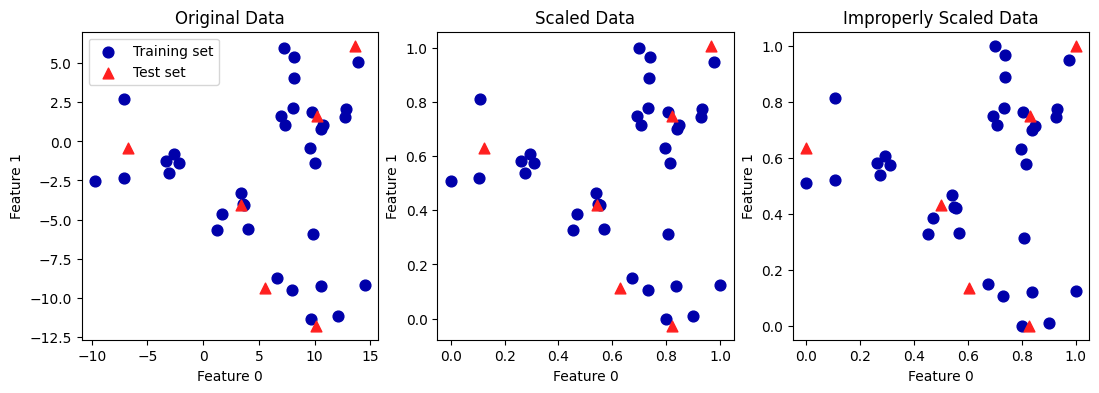

In [173]:
from matplotlib import pyplot as plt
from sklearn.datasets import make_blobs

# 构造数据
X, _ = make_blobs(n_samples=40, centers=5, random_state=4, cluster_std=2)
# 将其分为训练集和测试集 恬
X_train, X_test = train_test_split(X, random_state=5, test_size=.15)
# 绘制训练集和测试集
fig, axes = plt.subplots(1, 3, figsize=(13, 4))
axes[0].scatter(X_train[:, 0], X_train[:, 1],
                c=mglearn.cm2(0), label="Training set", s=60)
axes[0].scatter(X_test[:, 0], X_test[:, 1], marker='^',
                c=mglearn.cm2(1), label="Test set", s=60)
axes[0].legend(loc='upper left')
axes[0].set_title("Original Data")

# 利用MinMaxScaler缩放数据
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
# 将正确缩放的数据可视化
axes[1].scatter(X_train_scaled[:, 0], X_train_scaled[:, 1],
                c=mglearn.cm2(0), label="Training set", s=60)
axes[1].scatter(X_test_scaled[:, 0], X_test_scaled[:, 1], marker='^',
                c=mglearn.cm2(1), label="Test set", s=60)
axes[1].set_title("Scaled Data")

# 单独对测试集进行缩放
# 使得测试集的最小值为0，最大值为1
# 千万不要这么做！这里只是为了举例
test_scaler = MinMaxScaler()
test_scaler.fit(X_test)
X_test_scaled_badly = test_scaler.transform(X_test)

# 将错误缩放的数据可视化
axes[2].scatter(X_train_scaled[:, 0], X_train_scaled[:, 1],
                c=mglearn.cm2(0), label="training set", s=60)
axes[2].scatter(X_test_scaled_badly[:, 0], X_test_scaled_badly[:, 1],
                marker='^', c=mglearn.cm2(1), label="test set", s=60)
axes[2].set_title("Improperly Scaled Data")
for ax in axes:
    ax.set_xlabel("Feature 0")
    ax.set_ylabel("Feature 1")

第三张图展示了如果我们对训练集和测试集分别进行缩放会发生什么。
在这种情况下，对训练集和测试集而言，特征的最大值和最小值都是 1 和 0。
但现在数据集看起来不一样。
测试集相对训练集的移动不一致，因为它们分别做了不同的缩放。我们随意改变了数据的排列。这显然不是我们想要做的事情。

，所有具有 transform 方法的模型也都具有一个 fit_transform 方法。
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# 依次调用fit和transform（使用方法链）
X_scaled = scaler.fit(X).transform(X)
# 结果相同，但计算更加高效
X_scaled_d = scaler.fit_transform(X)
虽然 fit_transform 不一定对所有模型都更加高效，但在尝试变换训练集时，使用这
一方法仍然是很好的做法。

# 3.3.4　预处理对监督学习的作用

为了对比，我们再次在原始数据上拟合 SVC：

In [174]:
from sklearn.svm import SVC

X_train, X_test, y_train, y_test = train_test_split(cancer.data,
                                                    cancer.target,
                                                    random_state=0)
svm = SVC(C=100)
svm.fit(X_train, y_train)
print("Test set accuracy: {:.2f}".format(svm.score(X_test, y_test)))

Test set accuracy: 0.94


先用 MinMaxScaler 对数据进行缩放，然后再拟合 SVC：

In [175]:
# 使用0-1缩放进行预处理
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 在缩放后的训练数据上学习SVM
svm.fit(X_train_scaled, y_train)
print("Scaler test set accuracy：{:.2f}".format(
    svm.score(X_test_scaled, y_test)
))

Scaler test set accuracy：0.97


数据缩放的作用非常显著。虽然数据缩放不涉及任何复杂的数学，但良好的做法仍然是使用 scikit-learn 提供的缩放机制，而不是自己重新实现它们，因为即使在这些简单的计算中也容易犯错。

你也可以通过改变使用的类将一种预处理算法轻松替换成另一种，因为所有的预处理类都
具有相同的接口，都包含 fit 和 transform 方法：


In [176]:
# 利用零均值和单位方差的缩放方法进行预处理
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 在缩放后的训练数据上学习SVM
svm.fit(X_train_scaled, y_train)

# 在缩放后的测试集上计算分数
print("SVM test accuracy: {:.2f}".format(svm.score(X_test_scaled, y_test)))

SVM test accuracy: 0.96


# 3.4　降维、特征提取与流形学习

无监督学习进行数据变换最常见的目的就是可视化、压缩数据，以及寻找
信息量更大的数据表示以用于进一步的处理。

为了实现这些目的，最简单也最常用的一种算法就是主成分分析。
我们也将学习另外两种算法：非负矩阵分解（NMF）和 t-SNE，
前者通常用于特征提取，后者通常用于二维散点图的可视化。

3.4.1　主成分分析
主成分分析（principal component analysis，PCA）是一种旋转数据集的方法，旋转后的特
征在统计上不相关。
在做完这种旋转之后，通常是根据新特征对解释数据的重要性来选择它的一个子集。
下面的例子（图 3-3）展示了 PCA 对一个模拟二维数据集的作用：

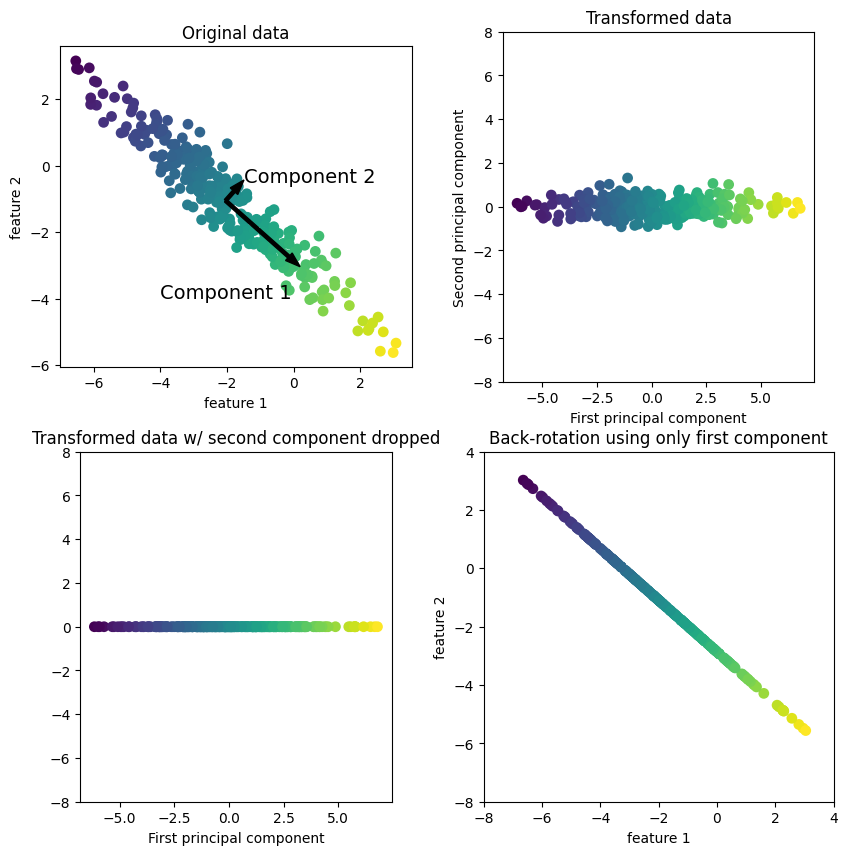

In [177]:
mglearn.plots.plot_pca_illustration()

我们也可以将第一个成分画成从中心指向左上，而不是指向右下。
利用这一过程找到的方向被称为主成分（principal component），因为它们是数据方差的主要方向。
一般来说，主成分的个数与原始特征相同

将 PCA 应用于 cancer 数据集并可视化
PCA 最常见的应用之一就是将高维数据集可视化。
我们可以使用一种更简单的可视化方法——对每个特征分别计算两个类别（良性肿瘤
和恶性肿瘤）的直方图

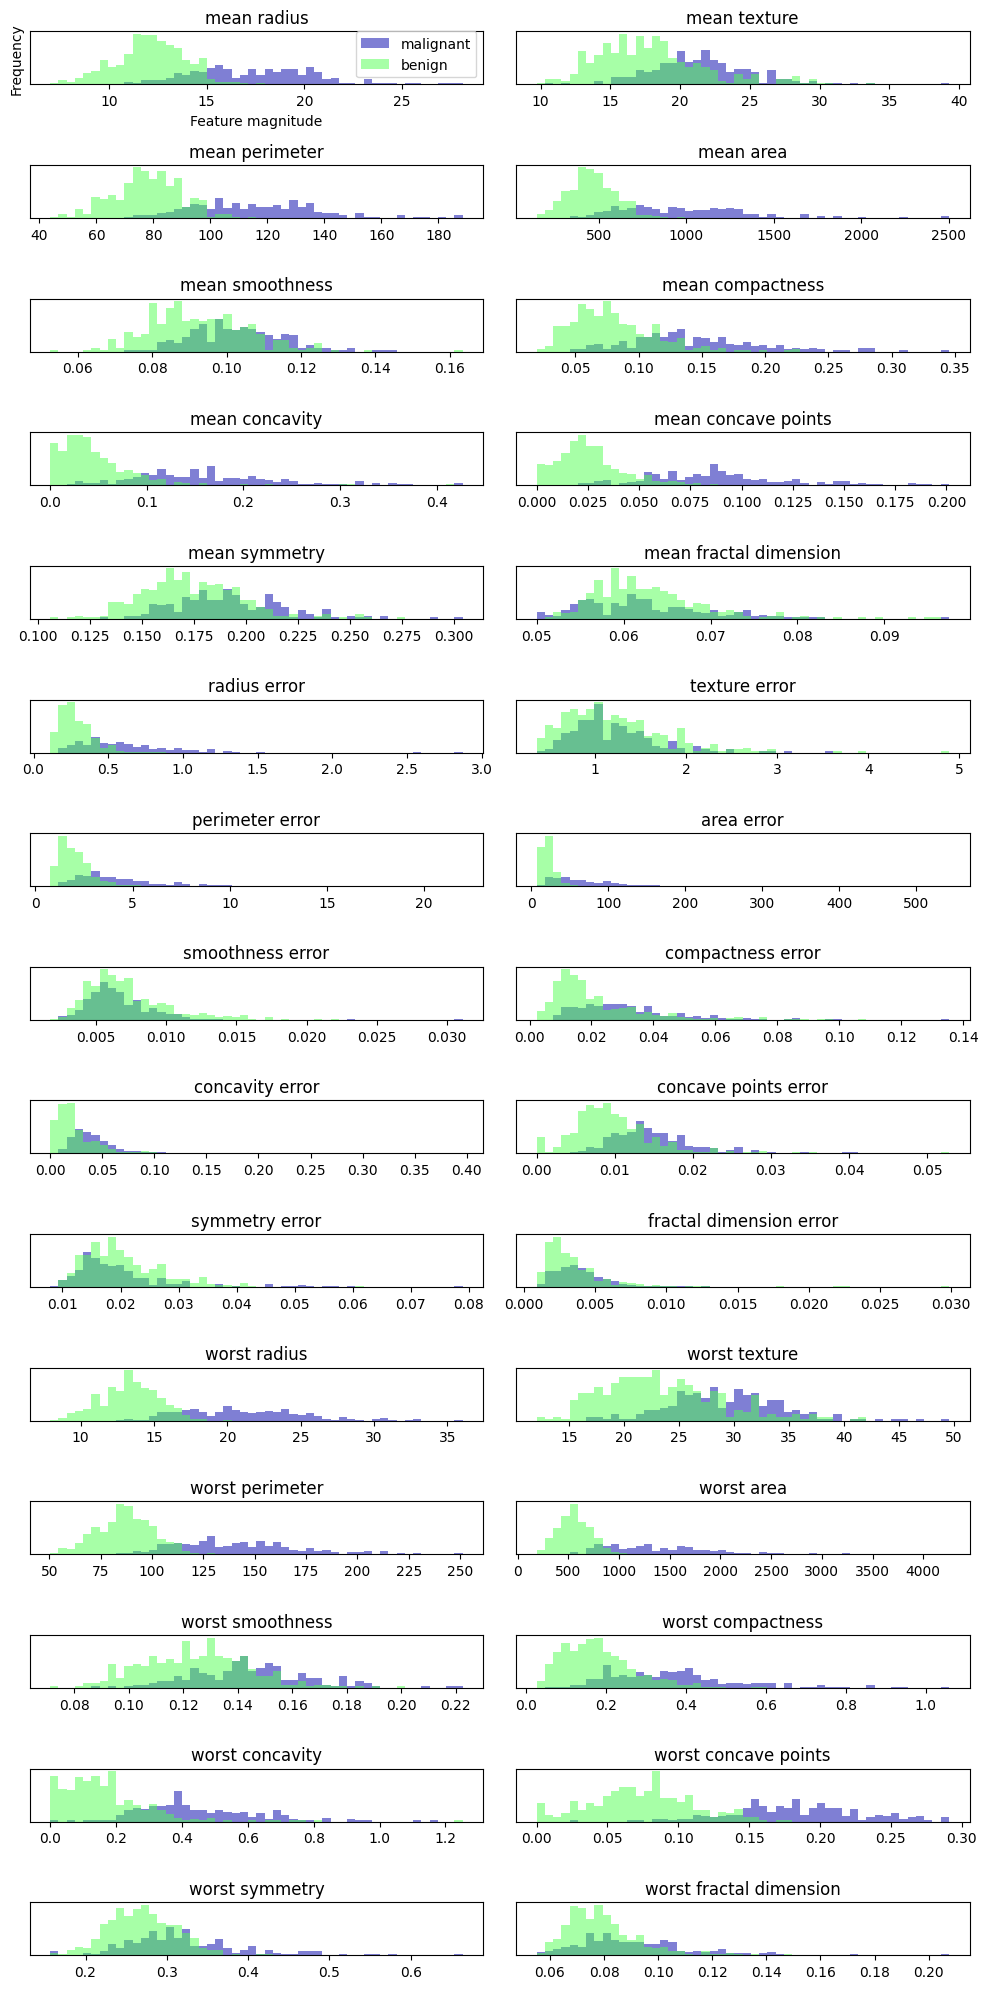

In [178]:
import numpy as np

fig, axes = plt.subplots(15, 2, figsize=(10, 20))
malignant = cancer.data[cancer.target == 0]
benign = cancer.data[cancer.target == 1]
ax = axes.ravel()
for i in range(30):
    _, bins = np.histogram(cancer.data[:, i], bins=50)
    ax[i].hist(malignant[:, i], bins=bins, color=mglearn.cm3(0), alpha=.5)
    ax[i].hist(benign[:, i], bins=bins, color=mglearn.cm3(2), alpha=.5)
    ax[i].set_title(cancer.feature_names[i])
    ax[i].set_yticks(())
ax[0].set_xlabel("Feature magnitude")
ax[0].set_ylabel("Frequency")
ax[0].legend(["malignant", "benign"], loc="best")
fig.tight_layout()


但是，这种图无法向我们展示变量之间的相互作用以及这种相互作用与类别之间的关系。
利用 PCA，我们可以获取到主要的相互作用，并得到稍为完整的图像。我们可以找到前两
个主成分，并在这个新的二维空间中用散点图将数据可视化。
在应用 PCA 之前，我们利用 StandardScaler 缩放数据，使每个特征的方差均为 1：

In [179]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
scaler = StandardScaler()
scaler.fit(cancer.data)
X_scaled = scaler.transform(cancer.data)

我们将 PCA 对象实例化，
调用 fit 方法找到主成分，
然后调用 transform 来旋转并降维。
默认情况下，PCA 仅旋转（并移动）数据，但保留所有的主成分。为了降低数据的维度，我们需要在创建 PCA 对象时指定想要保留的主成分个数：

In [180]:
from sklearn.decomposition import PCA

# 保留数据的前两个主成分
pca = PCA(n_components=2)
# 对乳腺癌数据拟合PCA模型
pca.fit(X_scaled)
# 将数据变换到前两个主成分的方向上
X_pca = pca.transform(X_scaled)
print("Original shape: {}".format(str(X_scaled.shape)))
print("Reduced shape: {}".format(str(X_pca.shape)))

Original shape: (569, 30)
Reduced shape: (569, 2)


Text(0, 0.5, 'Second principal component')

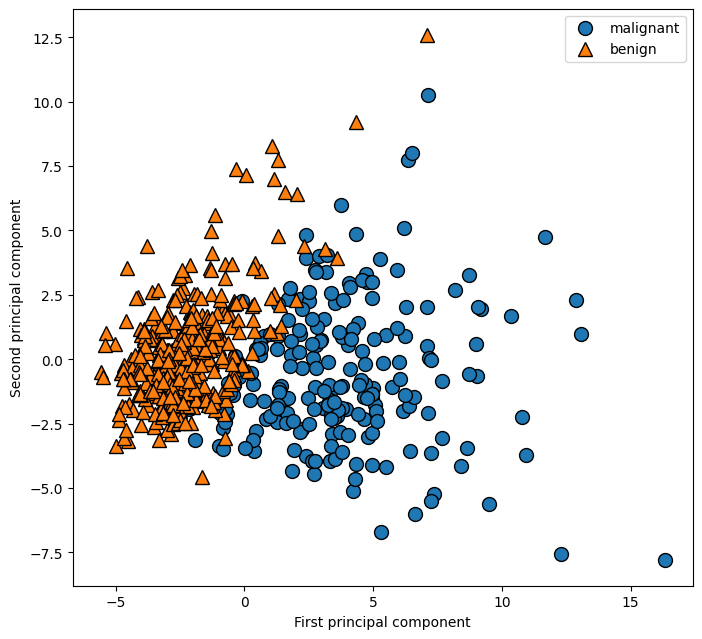

In [181]:
# 对第一个和第二个主成分作图，按类别着色
plt.figure(figsize=(8, 8))
mglearn.discrete_scatter(X_pca[:, 0], X_pca[:, 1], cancer.target)
plt.legend(cancer.target_names, loc="best")
plt.gca().set_aspect("equal")
plt.xlabel("First principal component")
plt.ylabel("Second principal component")

重要的是要注意，PCA 是一种无监督方法，在寻找旋转方向时没有用到任何类别信息。
它只是观察数据中的相关性。
对于这里所示的散点图，我们绘制了第一主成分与第二主成分的关系，然后利用类别信息对数据点进行着色。
可以看到，在这个二维空间中两个类别被很好地分离。这让我们相信，即使是线性分类器（在这个空间中学习一条直线）也可以在区分这个两个类别时表现得相当不错。
我们还可以看到，恶性点比良性点更加分散，这一点也可以在图 3-4 的直方图中看出来

PCA 的一个缺点在于，通常不容易对图中的两个轴做出解释。主成分对应于原始数据中的
方向，所以它们是原始特征的组合。但这些组合往往非常复杂，这一点我们很快就会看
到。在拟合过程中，主成分被保存在 PCA 对象的 components_ 属性中

In [182]:
print("PCA component shape: {}".format(pca.components_.shape))

PCA component shape: (2, 30)


In [183]:
print("PCA components:\n{}".format(pca.components_))


PCA components:
[[ 0.21890244  0.10372458  0.22753729  0.22099499  0.14258969  0.23928535
   0.25840048  0.26085376  0.13816696  0.06436335  0.20597878  0.01742803
   0.21132592  0.20286964  0.01453145  0.17039345  0.15358979  0.1834174
   0.04249842  0.10256832  0.22799663  0.10446933  0.23663968  0.22487053
   0.12795256  0.21009588  0.22876753  0.25088597  0.12290456  0.13178394]
 [-0.23385713 -0.05970609 -0.21518136 -0.23107671  0.18611302  0.15189161
   0.06016536 -0.0347675   0.19034877  0.36657547 -0.10555215  0.08997968
  -0.08945723 -0.15229263  0.20443045  0.2327159   0.19720728  0.13032156
   0.183848    0.28009203 -0.21986638 -0.0454673  -0.19987843 -0.21935186
   0.17230435  0.14359317  0.09796411 -0.00825724  0.14188335  0.27533947]]


以用热图将系数可视化

Text(0, 0.5, 'Principal components')

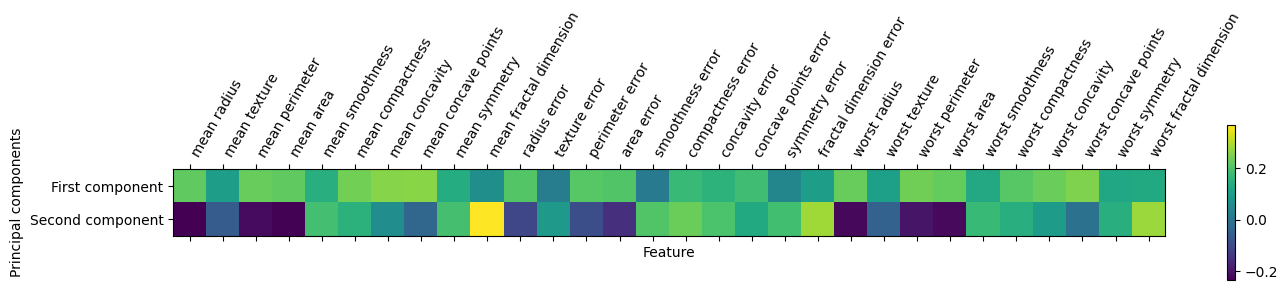

In [184]:
plt.matshow(pca.components_, cmap='viridis')
plt.yticks([0, 1], ["First component", "Second component"])
plt.colorbar()  # 图注
plt.xticks(range(len(cancer.feature_names)),
           cancer.feature_names, rotation=60, ha='left')
# 图
plt.xlabel("Feature")
plt.ylabel("Principal components")

你可以看到，在第一个主成分中，所有特征的符号相同（均为正，但前面我们提到过，
箭头指向哪个方向无关紧要）。
这意味着在所有特征之间存在普遍的相关性。如果一个测量值较大的话，其他的测量值可能也较大。
第二个主成分的符号有正有负，而且两个主成分都包含所有 30 个特征。

特征提取的特征脸

PCA 的另一个应用是特征提取。
特征提取背后的思想是，可以找到一种数据表示，比给定的原始表示更适合于分析。特征提取很有用，它的一个很好的应用实例就是图像。
图像由像素组成，通常存储为红绿蓝（RGB）强度。图像中的对象通常由上千个像素组成，它们只有放在一起才有意义。

我们将给出用 PCA 对图像做特征提取的一个简单应用，即处理 Wild 数据集 Labeled Faces（标记人脸）中的人脸图像。
这一数据集包含从互联网下载的名人脸部图像，它包含从 21世纪初开始的政治家、歌手、演员和运动员的人脸图像。
我们使用这些图像的灰度版本，并将它们按比例缩小以加快处理速度。其中一些图像：

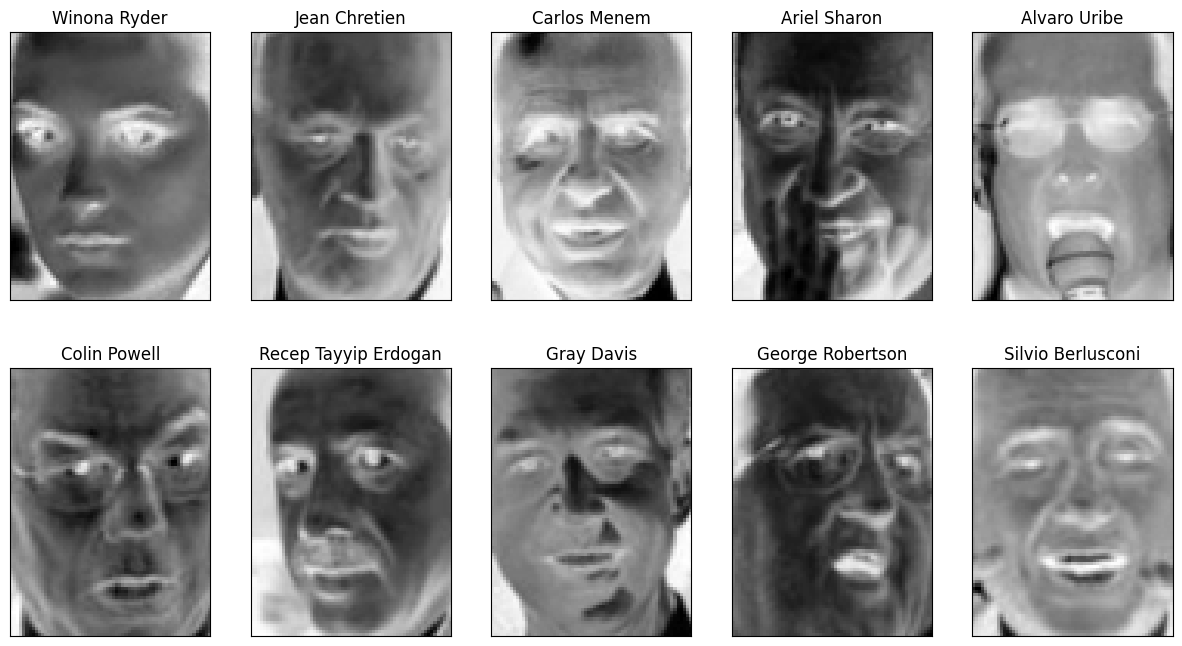

In [185]:
from sklearn.datasets import fetch_lfw_people
import matplotlib.pyplot as plt

people = fetch_lfw_people(min_faces_per_person=20, resize=0.7)

image_shape = people.images[0].shape
fix, axes = plt.subplots(2, 5, figsize=(15, 8),
                         subplot_kw={'xticks': (), 'yticks': ()})
for target, image, ax in zip(people.target, people.images, axes.ravel()):
    ax.imshow(image)
    ax.set_title(people.target_names[target])
# fetch_lfw_people 太难下载了

一共有 3023 张图像，每张大小为 87 像素 ×65 像素，分别属于 62 个不同的人：

In [186]:
print("people.images.shape: {}".format(people.images.shape))
print("Number of classes: {}".format(len(people.target_names)))


people.images.shape: (3023, 87, 65)
Number of classes: 62


In [187]:
import numpy as np

# 计算每个目标出现的次数
counts = np.bincount(people.target)
# 将次数与目标名称一起打印出来
for i, (count, name) in enumerate(zip(counts, people.target_names)):
    print("{0:25} {1:3}".format(name, count), end=' ')
    if (i + 1) % 3 == 0:
        print()


Alejandro Toledo           39 Alvaro Uribe               35 Amelie Mauresmo            21 
Andre Agassi               36 Angelina Jolie             20 Ariel Sharon               77 
Arnold Schwarzenegger      42 Atal Bihari Vajpayee       24 Bill Clinton               29 
Carlos Menem               21 Colin Powell              236 David Beckham              31 
Donald Rumsfeld           121 George Robertson           22 George W Bush             530 
Gerhard Schroeder         109 Gloria Macapagal Arroyo    44 Gray Davis                 26 
Guillermo Coria            30 Hamid Karzai               22 Hans Blix                  39 
Hugo Chavez                71 Igor Ivanov                20 Jack Straw                 28 
Jacques Chirac             52 Jean Chretien              55 Jennifer Aniston           21 
Jennifer Capriati          42 Jennifer Lopez             21 Jeremy Greenstock          24 
Jiang Zemin                20 John Ashcroft              53 John Negroponte            31 

一种简单的解决方法是使用单一最近邻分类器，寻找与你要分类的人脸最为相似的
人脸。这个分类器原则上可以处理每个类别只有一个训练样例的情况。下面看一下
KNeighborsClassifier 的表现如何：

In [188]:
mask = np.zeros(people.target.shape, dtype=np.bool_)
for target in np.unique(people.target):
    mask[np.where(people.target == target)[0][:25]] = 1

X_people = people.data[mask]
y_people = people.target[mask]

# 将灰度值缩放到0到1之间，而不是在0到255之间
# 以得到更好的数据稳定性
X_people = X_people / 255.


# # module 'numpy' has no attribute 'bool'.
# `np.bool` was a deprecated alias for the builtin `bool`. To avoid this error in existing code, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
# The aliases were originally deprecated in NumPy 1.20; for more details and guidance see the original release note at:
#     https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

我们得到的精度为 22%。对于包含 62 个类别的分类问题来说，这实际上不算太差（随机
猜测的精度约为 1/62=1.5%），但也不算好。我们每识别四次仅正确识别了一个人。

In [189]:
from sklearn.neighbors import KNeighborsClassifier

# 将数据分为训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(
    X_people, y_people, stratify=y_people, random_state=0)
# 使用一个邻居构建KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
print("Test set score of 1-nn: {:.2f}".format(knn.score(X_test, y_test)))

Test set score of 1-nn: 0.24


这里就可以用到 PCA。想要度量人脸的相似度，计算原始像素空间中的距离是一种相当糟糕的方法。
用像素表示来比较两张图像时，我们比较的是每个像素的灰度值与另一张图像对应位置的像素灰度值。这种表示与人们对人脸图像的解释方式有很大不同，使用这种原始表示很难获取到面部特征。例如，如果使用像素距离，那么将人脸向右移动一个像素将会发生巨大的变化，得到一个完全不同的表示。

我们希望，使用沿着主成分方向的距离可以提高精度。这里我们启用 PCA 的白化（whitening）选项，它将主成分缩放到相同的尺度。变换后的结果与使用 StandardScaler 相同。再次使用图 3-3 中的数据，白化不仅对应于旋转数据，还对应于缩放数据使其形状是圆形而不是椭圆（参见图 3-8）：

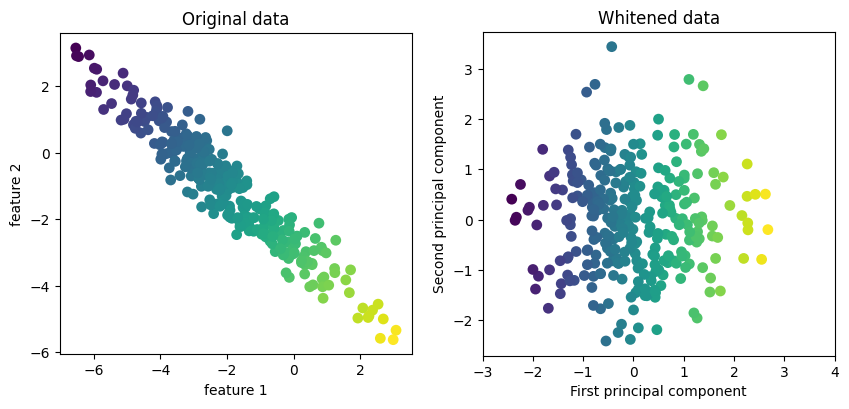

In [190]:
mglearn.plots.plot_pca_whitening()
# 利用启用白化的 PCA 进行数据变换

我们对训练数据拟合 PCA 对象，并提取前 100 个主成分。然后对训练数据和测试数据进行
变换：

In [191]:
pca = PCA(n_components=110, whiten=True, random_state=0).fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)
print("X_train_pca.shape: {}".format(X_train_pca.shape))

X_train_pca.shape: (1113, 110)


In [192]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train_pca, y_train)
print("Test set accuracy: {:.2f}".format(knn.score(X_test_pca, y_test)))
# 精度提高

Test set accuracy: 0.28


对于图像数据，我们还可以很容易地将找到的主成分可视化。请记住，成分对应于输入空间里的方向。
这里的输入空间是 87 像素 ×65 像素的灰度图像，所以在这个空间中的方向也是 87 像素 ×65 像素的灰度图像。
我们来看一下前几个主成分：

In [193]:
print("pca.components_.shape: {}".format(pca.components_.shape))

pca.components_.shape: (110, 5655)


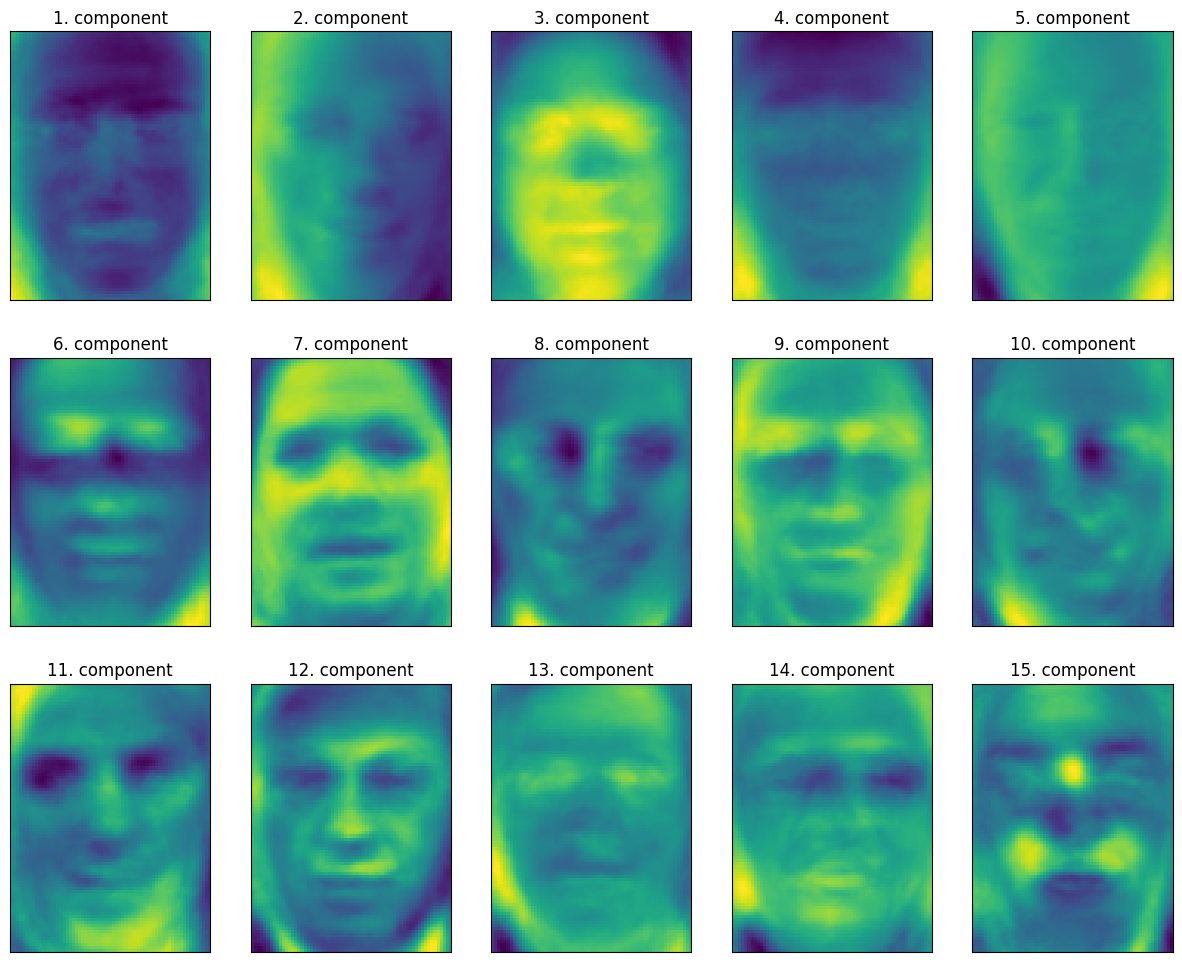

In [194]:
fix, axes = plt.subplots(3, 5, figsize=(15, 12),
                         subplot_kw={'xticks': (), 'yticks': ()})
for i, (component, ax) in enumerate(zip(pca.components_, axes.ravel())):
    ax.imshow(component.reshape(image_shape),
              cmap='viridis')
    ax.set_title("{}. component".format((i + 1)))
    plt.set_cmap('binary')


重要的是要记住，算法对数据（特别是视觉数据，比如人
们非常熟悉的图像）的解释通常与人类的解释方式大不相同。

两种理解，将图像分解为成分的加权求和
或 就是仅使用一些成分对原始数据进行重建

In [195]:
# mglearn.plots.plot_pca_faces(X_train, X_test, image_shape)
# # 画不出来……

Text(0, 0.5, 'Second principal component')

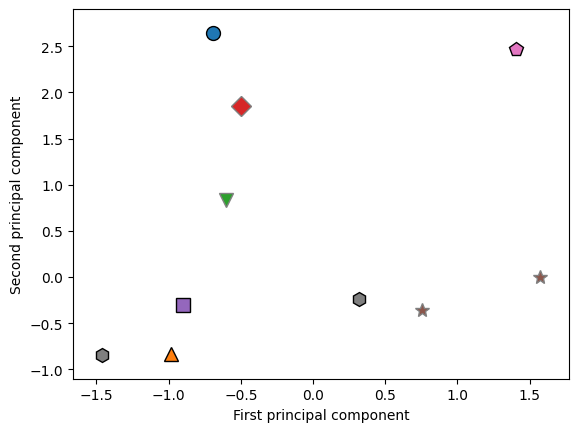

In [196]:
mglearn.discrete_scatter(X_train_pca[0:10, 0], X_train_pca[0:10, 1], y_train[0:10, ])
# plt.legend(loc='best')
plt.xlabel("First principal component")
plt.ylabel("Second principal component")

3.4.2　非负矩阵分解

非负矩阵分解（non-negative matrix factorization，NMF）是另一种无监督学习算法
其目的在于提取有用的特征。
与 PCA 相同，我们试图将每个数据点写成一些分量的加权求和。
但在 PCA 中，我们想要的是正交分量，并且能够解释尽可能多的数据方差；
而在 NMF 中，我们希望分量和系数均为非负，也就是说，我们希望分量和系数都大于或等于0
因此，这种方法只能应用于每个特征都是非负的数据，因为非负分量的非负求和不可能变为负值

将 NMF 应用于模拟数据
与使用 PCA 不同，我们需要保证数据是正的，NMF 能够对数据进行操作。这说明数据相
对于原点 (0, 0) 的位置实际上对 NMF 很重要。因此，你可以将提取出来的非负分量看作是
从 (0, 0) 到数据的方向。

C:\Users\win10\.conda\envs\pythonProject1\lib\site-packages\sklearn\decomposition\_nmf.py:1710: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


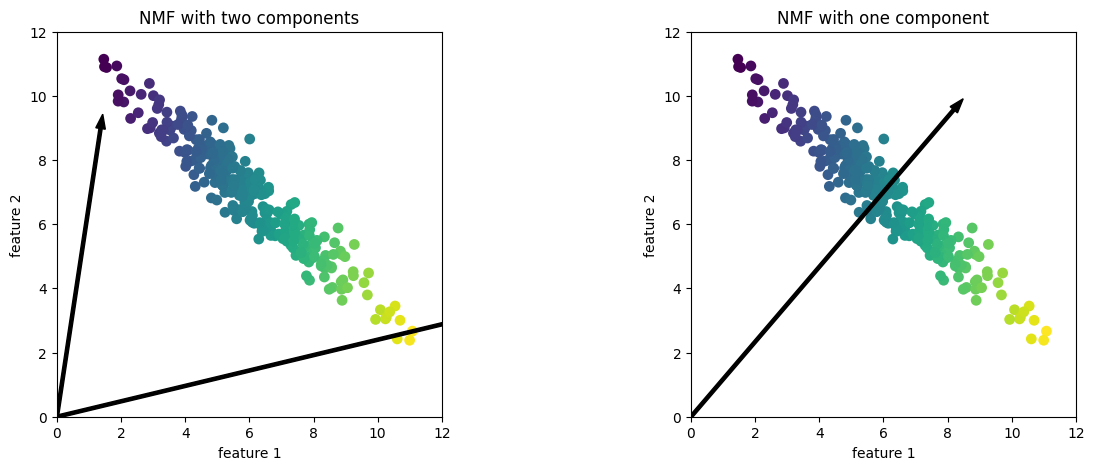

In [197]:
mglearn.plots.plot_nmf_illustration()


对于两个分量的 NMF（如左图所示），显然所有数据点都可以写成这两个分量的正数组合。
如果有足够多的分量能够完美地重建数据（分量个数与特征个数相同），那么算法会选择指向数据极值的方向。
如果我们仅使用一个分量，那么 NMF 会创建一个指向平均值的分量，因为指向这里可以对数据做出最好的解释。
你可以看到，与 PCA 不同，减少分量个数不仅会删除一些方向，而且会创建一组完全不同的分量！ NMF 的分量也没有按任何特定方法排序，所以不存在“第一非负分量”：所有分量的地位平等。

将 NMF 应用于人脸图像
现在我们将 NMF 应用于之前用过的 Wild 数据集中的 Labeled Faces。NMF 的主要参数是我们想要提取的分量个数。
通常来说，这个数字要小于输入特征的个数（否则的话，将每个像素作为单独的分量就可以对数据进行解释）

In [198]:
# mglearn.plots.plot_nmf_faces(X_train, X_test, image_shape)

反向变换的数据质量与使用 PCA 时类似，但要稍差一些。
这是符合预期的，因为 PCA 找到的是重建的最佳方向。
NMF 通常并不用于对数据进行重建或编码，而是用于在数据中寻找有趣的模式。

C:\Users\win10\.conda\envs\pythonProject1\lib\site-packages\sklearn\decomposition\_nmf.py:1710: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


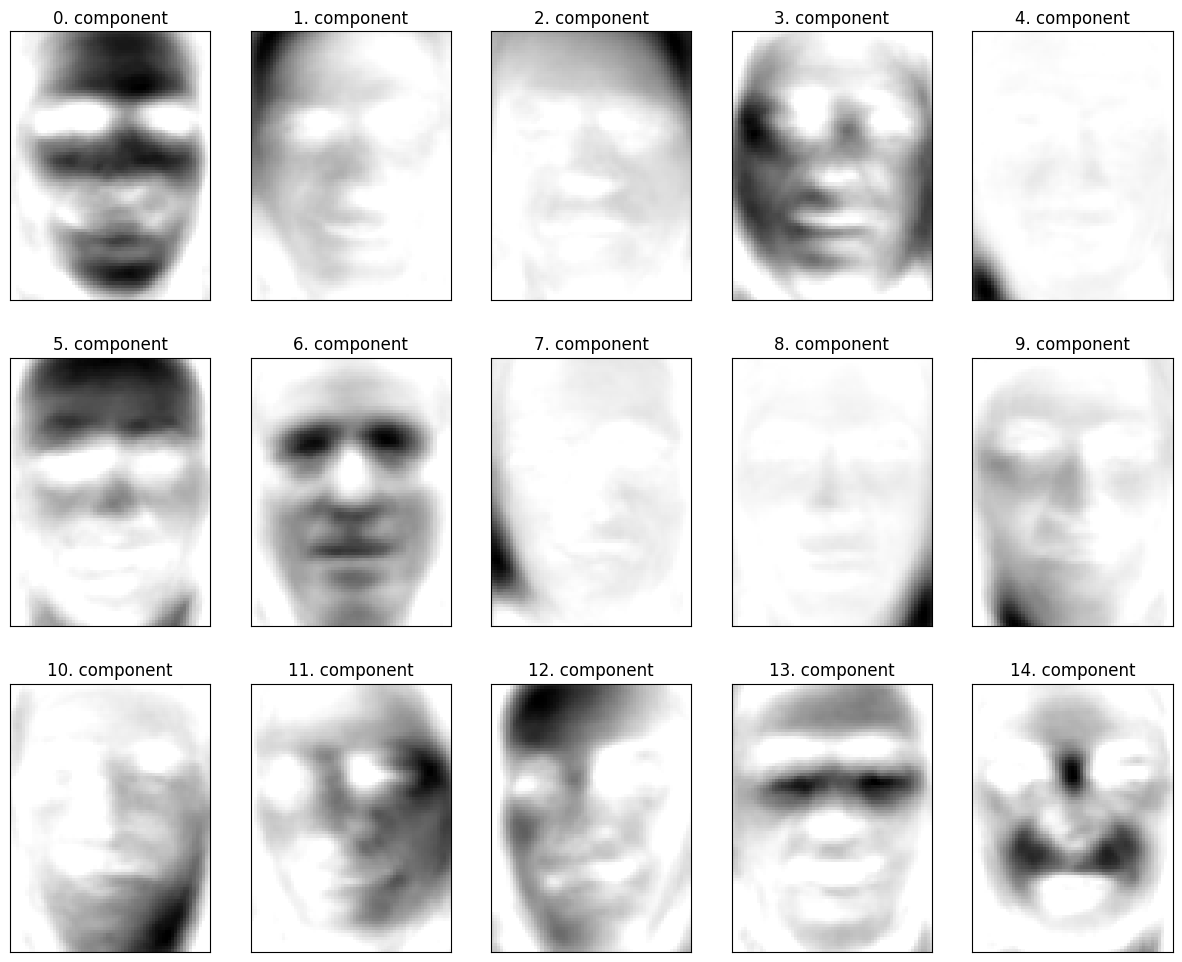

In [199]:
from sklearn.decomposition import NMF

nmf = NMF(n_components=15, random_state=0)
nmf.fit(X_train)
X_train_nmf = nmf.transform(X_train)
X_test_nmf = nmf.transform(X_test)
fix, axes = plt.subplots(3, 5, figsize=(15, 12),
                         subplot_kw={'xticks': (), 'yticks': ()})
for i, (component, ax) in enumerate(zip(nmf.components_, axes.ravel())):
    ax.imshow(component.reshape(image_shape))
    ax.set_title("{}. component".format(i))
    plt.set_cmap('binary')


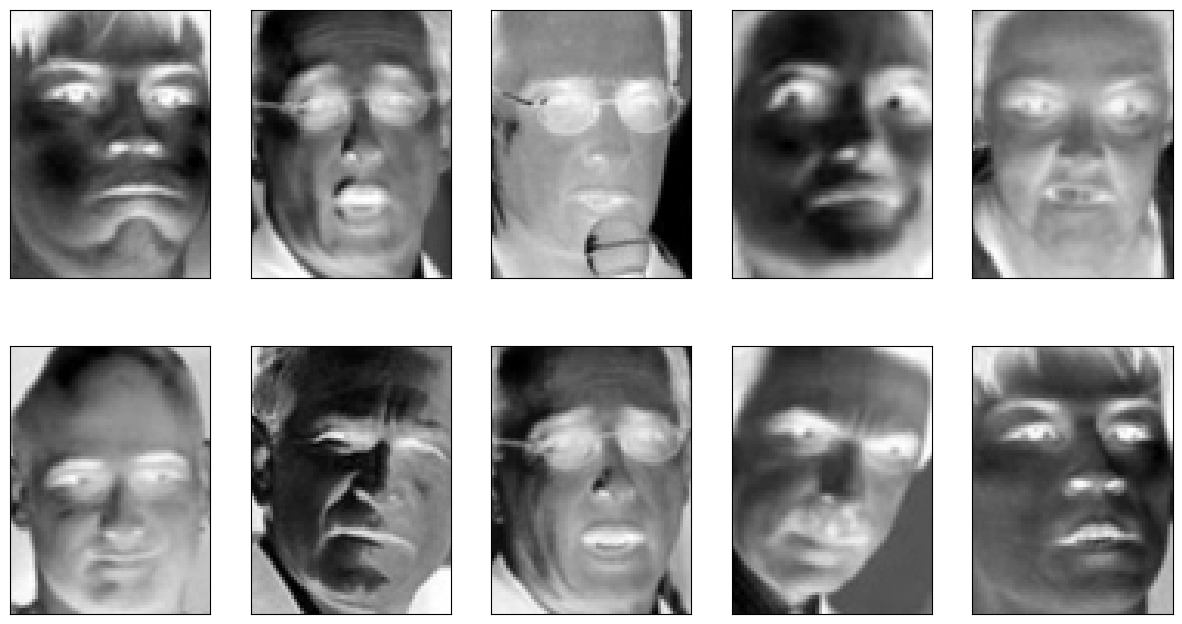

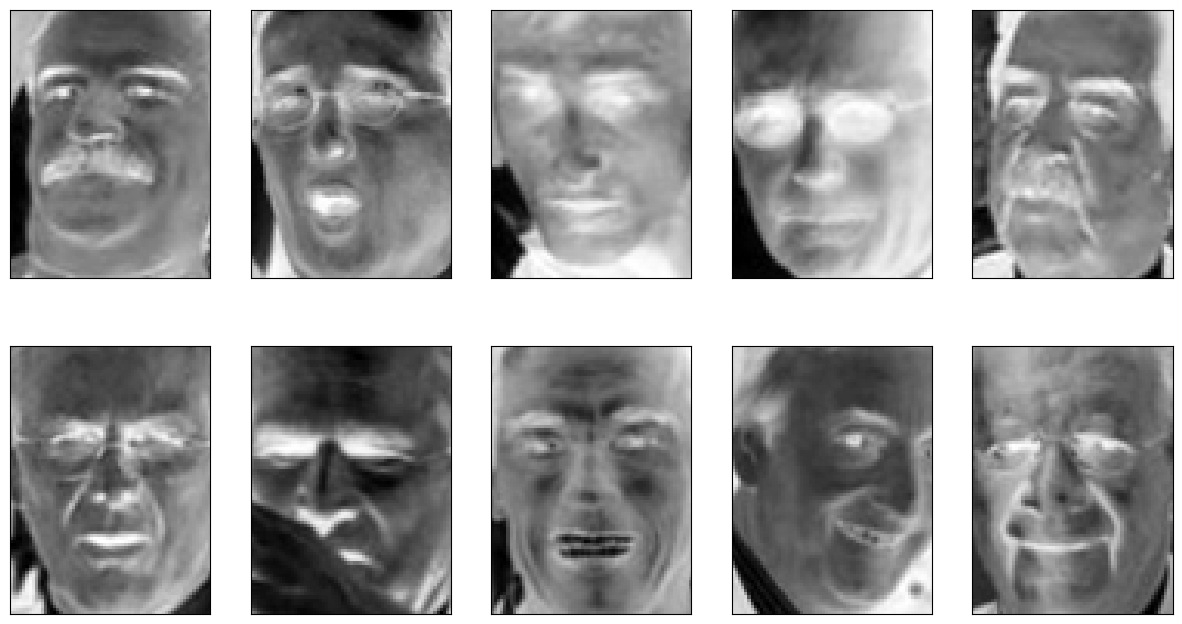

In [200]:
compn = 3
# 按第3个分量排序，绘制前10张图像
inds = np.argsort(X_train_nmf[:, compn])[::-1]
fig, axes = plt.subplots(2, 5, figsize=(15, 8),
                         subplot_kw={'xticks': (), 'yticks': ()})
for i, (ind, ax) in enumerate(zip(inds, axes.ravel())):
    ax.imshow(X_train[ind].reshape(image_shape))
    plt.set_cmap('binary')
compn = 7
# 按第7个分量排序，绘制前10张图像
inds = np.argsort(X_train_nmf[:, compn])[::-1]
fig, axes = plt.subplots(2, 5, figsize=(15, 8),
                         subplot_kw={'xticks': (), 'yticks': ()})
for i, (ind, ax) in enumerate(zip(inds, axes.ravel())):
    ax.imshow(X_train[ind].reshape(image_shape))
    plt.set_cmap('binary')


正如所料，分量 3 系数较大的人脸都是向右看的人脸（图 3-16），而分量 7 系数较大的人
脸都向左看（图 3-17）。如前所述，提取这样的模式最适合于具有叠加结构的数据，包括
音频、基因表达和文本数据。

我们通过一个模拟数据的例子来看一下这种用法。

假设我们对一个信号感兴趣，它是三个不同信号源合成的

Text(0, 0.5, 'Signal')

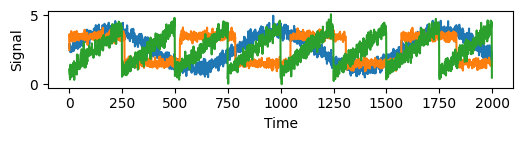

In [201]:
S = mglearn.datasets.make_signals()
plt.figure(figsize=(6, 1))
plt.plot(S, '-')
plt.xlabel("Time")
plt.ylabel("Signal")

不幸的是，我们无法观测到原始信号，只能观测到三个信号的叠加混合。我们想要将混合信号分解为原始分量。
假设我们有许多种不同的方法来观测混合信号（比如有 100 台测量装置），每种方法都为我们提供了一系列测量结果。

In [202]:
# 将数据混合成100维的状态
A = np.random.RandomState(0).uniform(size=(100, 3))
X = np.dot(S, A.T)
print("Shape of measurements: {}".format(X.shape))

Shape of measurements: (2000, 100)


我们可以用 NMF 来还原这三个信号：

In [203]:
nmf = NMF(n_components=3, random_state=42)
S_ = nmf.fit_transform(X)
print("Recovered signal shape: {}".format(S_.shape))

Recovered signal shape: (2000, 3)


为了对比，我们也应用了 PCA：

In [204]:
pca = PCA(n_components=3)
H = pca.fit_transform(X)

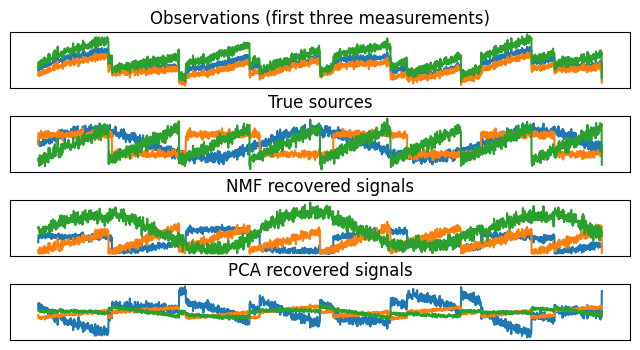

In [205]:
models = [X, S, S_, H]
names = ['Observations (first three measurements)',
         'True sources',
         'NMF recovered signals',
         'PCA recovered signals']
fig, axes = plt.subplots(4, figsize=(8, 4),
                         gridspec_kw={'hspace': .5},
                         subplot_kw={'xticks': (), 'yticks': ()})
for model, name, ax in zip(models, names, axes):
    ax.set_title(name)
    ax.plot(model[:, :3], '-')

# 用t-SNE进行流形学习
虽然 PCA 通常是用于变换数据的首选方法，使你能够用散点图将其可视化，但这一方法的性质（先旋转然后减少方向）限制了其有效性，正如我们在 Wild 数据集 Labeled Faces
的散点图中所看到的那样。
有一类用于可视化的算法叫作流形学习算法（manifold learning algorithm），
它允许进行更复杂的映射，通常也可以给出更好的可视化。其中特别有用的一个就是 t-SNE 算法。

t-SNE（t-Distributed Stochastic Neighbor Embedding）是一种用于高维数据可视化和降维的强大技术。


流形学习对探索性数据分析是很有用的，但如果最终目标是监督学习的话，则很少使用。
t-SNE 背后的思想是找到数据的一个二维表示，尽可能地保持数据点之间的距离。
t-SNE 首先给出每个数据点的随机二维表示，然后尝试让在原始特征空间中距离较近的点更加靠近，原始特征空间中相距较远的点更加远离。
t-SNE 重点关注距离较近的点，而不是保持距离较远的点之间的距离。换句话说，它试图保存那些表示哪些点比较靠近的信息。

我们将对 scikit-learn 包含的一个手写数字数据集 2 应用 t-SNE 流形学习算法。
在这个数据集中，每个数据点都是 0 到 9 之间手写数字的一张 8×8 灰度图像。


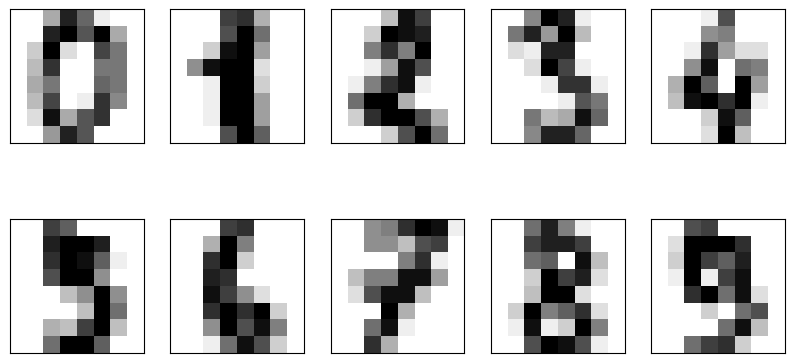

In [206]:
from sklearn.datasets import load_digits

digits = load_digits()
fig, axes = plt.subplots(2, 5, figsize=(10, 5),
                         subplot_kw={'xticks': (), 'yticks': ()})
for ax, img in zip(axes.ravel(), digits.images):
    ax.imshow(img)

我们用 PCA 将降到二维的数据可视化。我们对前两个主成分作图，并按类别对数据点着色

Text(0, 0.5, 'Second principal component')

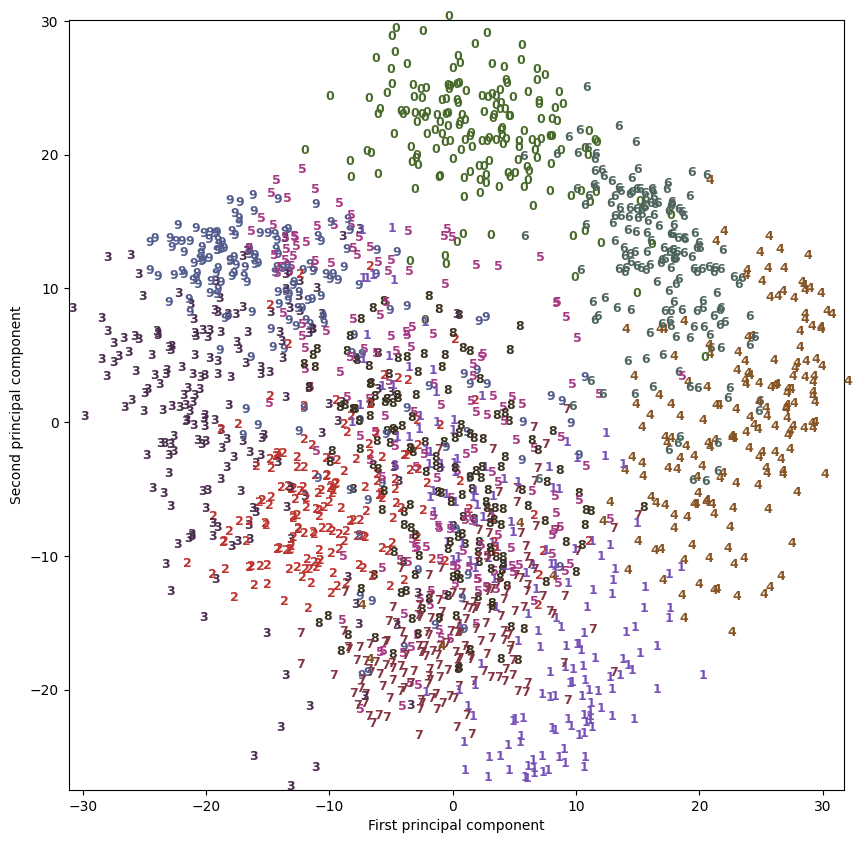

In [207]:
# 构建一个PCA模型
pca = PCA(n_components=2)
pca.fit(digits.data)
# 将digits数据变换到前两个主成分的方向上

digits_pca = pca.transform(digits.data)
colors = ["#476A2A", "#7851B8", "#BD3430", "#4A2D4E", "#875525",
          "#A83683", "#4E655E", "#853541", "#3A3120", "#535D8E"]
plt.figure(figsize=(10, 10))
plt.xlim(digits_pca[:, 0].min(), digits_pca[:, 0].max())
plt.ylim(digits_pca[:, 1].min(), digits_pca[:, 1].max())
for i in range(len(digits.data)):
    # 将数据实际绘制成文本，而不是散点
    plt.text(digits_pca[i, 0], digits_pca[i, 1], str(digits.target[i]),
             color=colors[digits.target[i]],
             fontdict={'weight': 'bold', 'size': 9})
plt.xlabel("First principal component")
plt.ylabel("Second principal component")

我们将 t-SNE 应用于同一个数据集，并对结果进行比较。
由于 t-SNE 不支持变换新数据，所以 TSNE 类没有 transform 方法。
我们可以调用 fit_transform 方法来代替，它会构建模型并立刻返回变换后的数据.

Text(0.5, 0, 't-SNE feature 1')

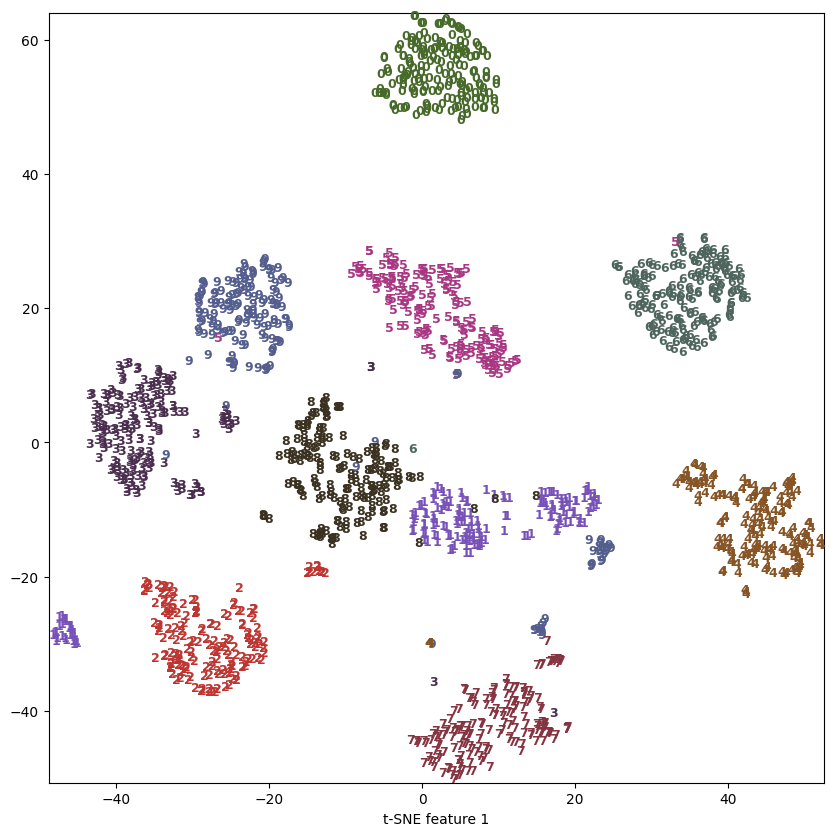

In [208]:
from sklearn.manifold import TSNE

tsne = TSNE(random_state=42)
# 使用fit_transform而不是fit，因为TSNE没有transform方法
digits_tsne = tsne.fit_transform(digits.data)

plt.figure(figsize=(10, 10))
plt.xlim(digits_tsne[:, 0].min(), digits_tsne[:, 0].max() + 1)
plt.ylim(digits_tsne[:, 1].min(), digits_tsne[:, 1].max() + 1)
for i in range(len(digits.data)):
    # 将数据实际绘制成文本，而不是散点
    plt.text(digits_tsne[i, 0], digits_tsne[i, 1],
             str(digits.target[i]),
             color=colors[digits.target[i]],
             fontdict={'weight': 'bold', 'size': 9})
plt.xlabel("t-SNE feature 0")
plt.xlabel("t-SNE feature 1")

t-SNE 的结果非常棒。所有类别都被明确分开。数字 1 和 9 被分成几块，但大多数类别都形成一个密集的组。要记住，这种方法并不知道类别标签：它完全是无监督的。
但它能够找到数据的一种二维表示，仅根据原始空间中数据点之间的靠近程度就能够将各个类别明
确分开。
t-SNE 算法有一些调节参数，虽然默认参数的效果通常就很好。你可以尝试修改perplexity 和 early_exaggeration，但作用一般很小

# 3.5　聚类
我们前面说过，聚类（clustering）是将数据集划分成组的任务，这些组叫作簇（cluster）。
其目标是划分数据，使得一个簇内的数据点非常相似且不同簇内的数据点非常不同。与分类算法类似，聚类算法为每个数据点分配（或预测）一个数字，表示这个点属于哪个簇。

k均值聚类
k 均值聚类是最简单也最常用的聚类算法之一。它试图找到代表数据特定区域的簇中心（cluster center）。
算法交替执行以下两个步骤：将每个数据点分配给最近的簇中心，然后将每个簇中心设置为所分配的所有数据点的平均值。如果簇的分配不再发生变化，那么算法结束。

C:\Users\win10\.conda\envs\pythonProject1\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\win10\.conda\envs\pythonProject1\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\win10\.conda\envs\pythonProject1\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\win10\.conda\envs\pythonProject1\lib\site-packages\sklearn\cluster\_kmeans.p

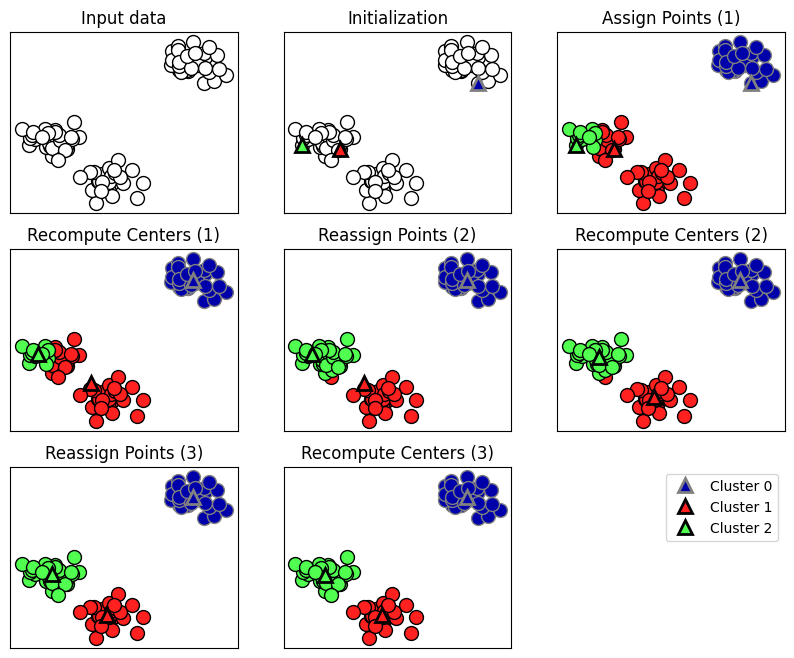

In [209]:
mglearn.plots.plot_kmeans_algorithm()
# 输入数据与 k 均值算法的三个步骤


簇中心用三角形表示，而数据点用圆形表示。颜色表示簇成员。我们指定要寻找三个簇，所以通过声明三个随机数据点为簇中心来将算法初始化（见图中“Initialization”/“初始化”）。
然后开始迭代算法。首先，每个数据点被分配给距离最近的簇中心（见图中“Assign Points (1)”/“分配数据点（1）”）。
接下来，将簇中心修改为所分配点的平均值（见图中“Recompute Centers (1)”/“重新计算中心（1）”）。
然后将这一过程再重复两次。在第三次迭代之后，为簇中心分配的数据点保持不变，因此算法结束。给定新的数据点，k 均值会将其分配给最近的簇中心。

C:\Users\win10\.conda\envs\pythonProject1\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


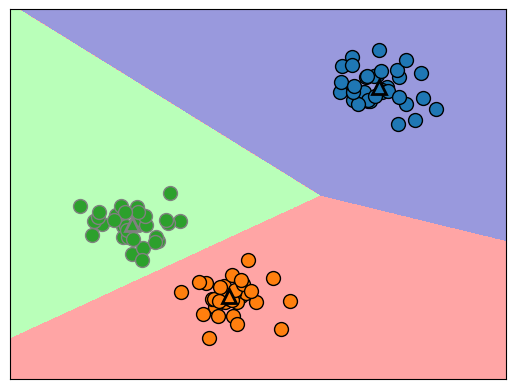

In [210]:
mglearn.plots.plot_kmeans_boundaries()

用 scikit-learn 应用 k 均值相当简单。下面我们将其应用于上图中的模拟数据。我们将
KMeans 类实例化，并设置我们要寻找的簇个数 3
。然后对数据调用 fit 方法：

算法运行期间，为 X 中的每个训练数据点分配一个簇标签。你可以在 kmeans.labels_ 属性
中找到这些标签：

In [211]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

# 生成模拟的二维数据
X, y = make_blobs(random_state=1)
# 构建聚类模型
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

print("Cluster memberships:\n{}".format(kmeans.labels_))


C:\Users\win10\.conda\envs\pythonProject1\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Cluster memberships:
[1 2 2 2 0 0 0 2 1 1 2 2 0 1 0 0 0 1 2 2 0 2 0 1 2 0 0 1 1 0 1 1 0 1 2 0 2
 2 2 0 0 2 1 2 2 0 1 1 1 1 2 0 0 0 1 0 2 2 1 1 2 0 0 2 2 0 1 0 1 2 2 2 0 1
 1 2 0 0 1 2 1 2 2 0 1 1 1 1 2 1 0 1 1 2 2 0 0 1 0 1]


C:\Users\win10\.conda\envs\pythonProject1\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


可以看到，聚类算法与分类算法有些相似，每个元素都有一个标签。但并不存在真实的标签，
因此标签本身并没有先验意义。我们回到之前讨论过的人脸图像聚类的例子。聚类的结果可能是，算法找到的第 3 个簇仅包含你朋友 Bela 的面孔。
但只有在查看图片之后才能知道这一点，而且数字 3 是任意的。算法给你的唯一信息就是所有标签为 3 的人脸都是相似的。
对于我们刚刚在二维玩具数据集上运行的聚类算法，这意味着我们不应该为其中一组的标签是 0、另一组的标签是 1 这一事实赋予任何意义。
再次运行该算法可能会得到不同的簇编号，原因在于初始化的随机性质。下面又给出了这个数据的图像（图 3-25）。
簇中心被保存在 cluster_centers_ 属性中，我们用三角形表示它们

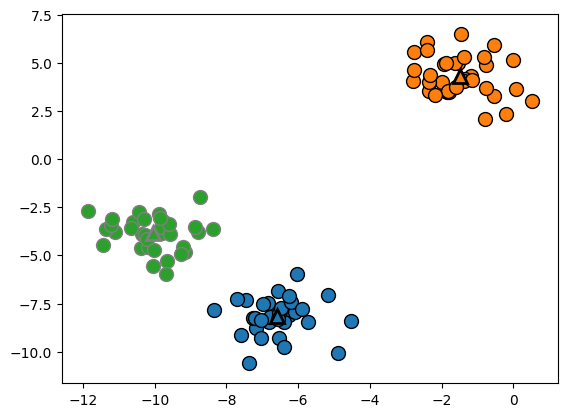

In [212]:
mglearn.discrete_scatter(X[:, 0], X[:, 1], kmeans.labels_, markers='o')
mglearn.discrete_scatter(
    kmeans.cluster_centers_[:, 0],
    kmeans.cluster_centers_[:, 1], [0, 1, 2],
    markers='^', markeredgewidth=2)


对于我们刚刚在二维玩具数据集上运行的聚类算法，这意味着我们不应该为其中一组的标签是 0、另一组的标签是 1 这一事实赋予任何意义。
再次运行该算法可能会得到不同的簇编号，原因在于初始化的随机性质。
下面又给出了这个数据的图像（图 3-25）。簇中心被保存在 cluster_centers_ 属性中，我
们用三角形表示它们

C:\Users\win10\.conda\envs\pythonProject1\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\win10\.conda\envs\pythonProject1\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\win10\.conda\envs\pythonProject1\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\win10\.conda\envs\pythonProject1\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMean

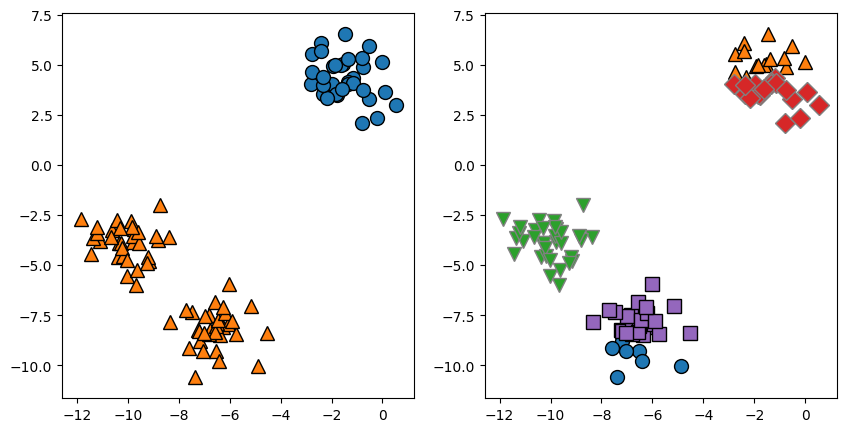

In [213]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
# 使用2个簇中心：
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
assignments = kmeans.labels_
mglearn.discrete_scatter(X[:, 0], X[:, 1], assignments, ax=axes[0])
# 使用5个簇中心：
kmeans = KMeans(n_clusters=5)
kmeans.fit(X)
assignments = kmeans.labels_
mglearn.discrete_scatter(X[:, 0], X[:, 1], assignments, ax=axes[1])


# k均值的失败案例
即使你知道给定数据集中簇的“正确”个数，k 均值可能也不是总能找到它们。每个簇仅由其中心定义，这意味着每个簇都是凸形（convex）。
因此，k 均值只能找到相对简单的形状。k 均值还假设所有簇在某种程度上具有相同的“直径”，它总是将簇之间的边界刚好画在簇中心的中间位置。有时这会导致令人惊讶的结果
——— ——— ——
//簇的密度不同时，k 均值找到的簇分配:

C:\Users\win10\.conda\envs\pythonProject1\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\win10\.conda\envs\pythonProject1\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Text(0, 0.5, 'Feature 1')

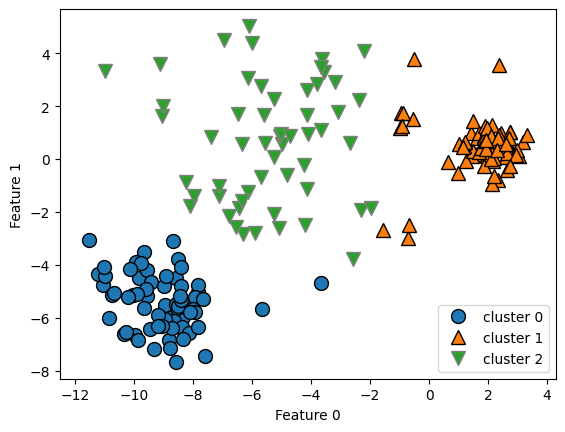

In [214]:
X_varied, y_varied = make_blobs(n_samples=200,
                                cluster_std=[1.0, 2.5, 0.5],
                                random_state=170)
y_pred = KMeans(n_clusters=3, random_state=0).fit_predict(X_varied)

mglearn.discrete_scatter(X_varied[:, 0], X_varied[:, 1], y_pred)
plt.legend(["cluster 0", "cluster 1", "cluster 2"], loc='best')
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

你可能会认为，左下方的密集区域是第一个簇，右上方的密集区域是第二个，中间密度较小的区域是第三个。但事实上，簇 0 和簇 1 都包含一些远离簇中其他点的点。

k 均值还假设所有方向对每个簇都同等重要。
图 3-28 显示了一个二维数据集，数据中包含明确分开的三部分。
但是这三部分被沿着对角线方向拉长。由于 k 均值仅考虑到最近簇中心的距离，所以它无法处理这种类型的数据：

C:\Users\win10\.conda\envs\pythonProject1\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\win10\.conda\envs\pythonProject1\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


Text(0, 0.5, 'Feature 1')

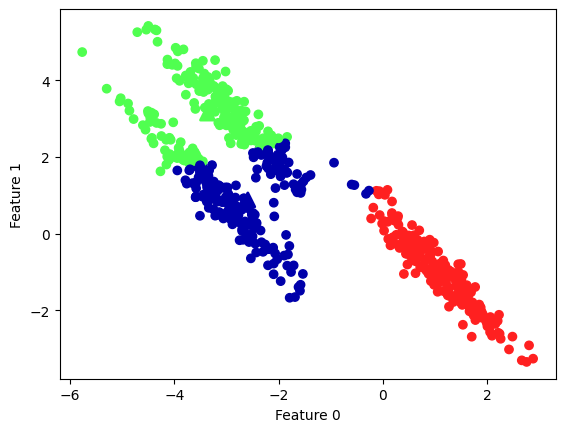

In [215]:
# 生成一些随机分组数据
X, y = make_blobs(random_state=170, n_samples=600)
rng = np.random.RandomState(74)
# 变换数据使其拉长
transformation = rng.normal(size=(2, 2))
X = np.dot(X, transformation)
# 将数据聚类成3个簇
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
y_pred = kmeans.predict(X)
# 画出簇分配和簇中心
plt.scatter(X[:, 0], X[:, 1], c=y_pred, cmap=mglearn.cm3)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            marker='^', c=[0, 1, 2], s=100, linewidth=2, cmap=mglearn.cm3)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

如果簇的形状更加复杂，比如我们在第 2 章遇到的 two_moons 数据，那么 k 均值的表现也很差

C:\Users\win10\.conda\envs\pythonProject1\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\win10\.conda\envs\pythonProject1\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Text(0, 0.5, 'Feature 1')

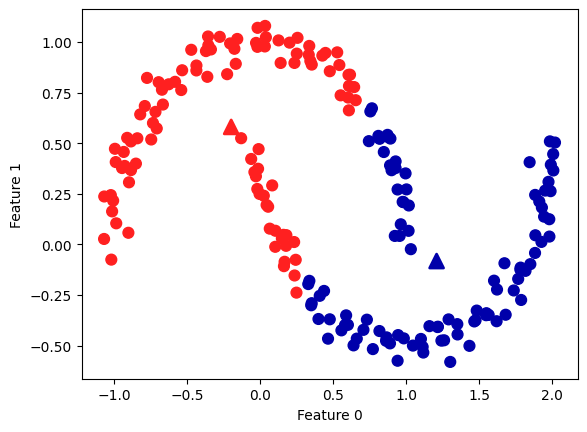

In [216]:
# 生成模拟的two_moons数据（这次的噪声较小）
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=200, noise=0.05, random_state=0)
# 将数据聚类成2个簇
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
y_pred = kmeans.predict(X)
# 画出簇分配和簇中心
plt.scatter(X[:, 0], X[:, 1], c=y_pred, cmap=mglearn.cm2, s=60)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            marker='^', c=[mglearn.cm2(0), mglearn.cm2(1)], s=100, linewidth=2)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")


虽然 k 均值是一种聚类算法，但在 k 均值和分解方法（比如之前讨论过的 PCA 和 NMF）之间存在一些有趣的相似之处。

你可能还记得，PCA 试图找到数据中方差最大的方向，而NMF 试图找到累加的分量，这通常对应于数据的“极值”或“部分”（见图 3-13）。两种方法都试图将数据点表示为一些分量之和。

与之相反，k 均值则尝试利用簇中心来表示每个数据点。你可以将其看作仅用一个分量来表示每个数据点，该分量由簇中心给出。这种观点将 k 均值看作是一种分解方法，其中每个点用单一分量来表示，这种观点被称为矢量量化（vector quantization）。

我们来并排比较 PCA、NMF 和 k 均值，分别显示提取的分量（图 3-30），以及利用 100 个分量对测试集中人脸的重建（图 3-31）。

对于 k 均值，重建就是在训练集中找到的最近的簇中心:

In [217]:
X_train, X_test, y_train, y_test = train_test_split(X_people,
                                                    y_people,
                                                    stratify=y_people,
                                                    random_state=0)
nmf = NMF(n_components=100, random_state=0)
nmf.fit(X_train)

pca = PCA(n_components=100, random_state=0)
pca.fit(X_train)

kmeans = KMeans(n_clusters=100, random_state=0)
kmeans.fit(X_train)

X_reconstructed_pca = pca.inverse_transform(pca.transform(X_test))
X_reconstructed_kmeans = kmeans.cluster_centers_[kmeans.predict(X_test)]
X_reconstructed_nmf = np.dot(nmf.transform(X_test), nmf.components_)

C:\Users\win10\.conda\envs\pythonProject1\lib\site-packages\sklearn\decomposition\_nmf.py:1710: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
C:\Users\win10\.conda\envs\pythonProject1\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\win10\.conda\envs\pythonProject1\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(


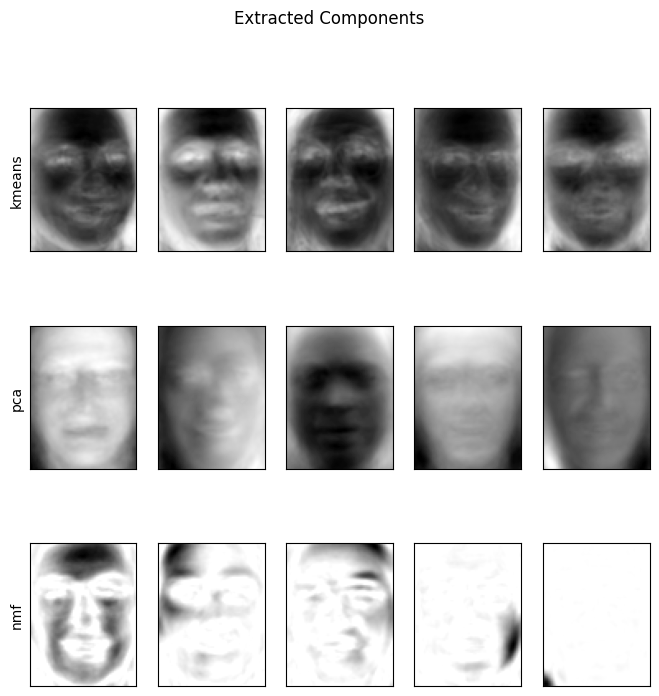

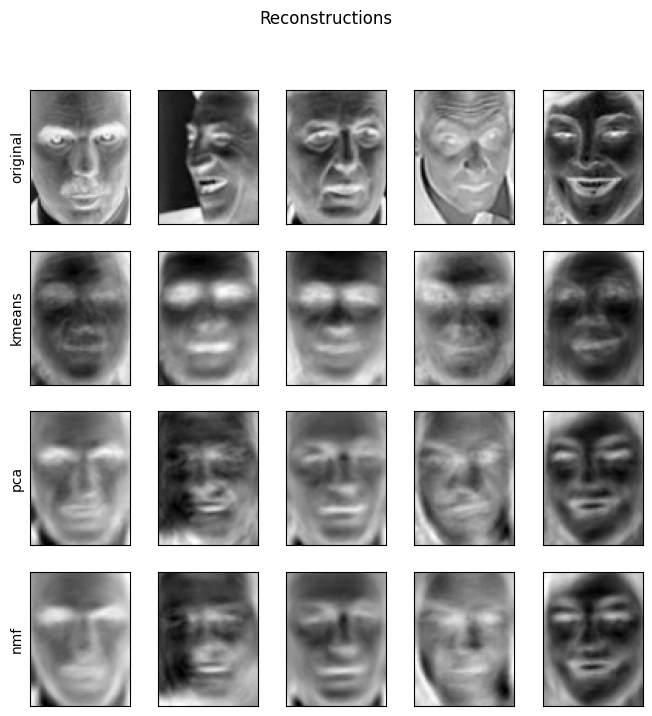

In [218]:
fig, axes = plt.subplots(3, 5, figsize=(8, 8),
                         subplot_kw={'xticks': (),
                                     'yticks': ()})

fig.suptitle("Extracted Components")
for ax, comp_kmeans, comp_pca, comp_nmf in zip(
        axes.T, kmeans.cluster_centers_, pca.components_, nmf.components_):
    ax[0].imshow(comp_kmeans.reshape(image_shape))
    plt.set_cmap('binary')
    ax[1].imshow(comp_pca.reshape(image_shape))
    plt.set_cmap('binary')
    ax[2].imshow(comp_nmf.reshape(image_shape))
    plt.set_cmap('binary')

axes[0, 0].set_ylabel("kmeans")
axes[1, 0].set_ylabel("pca")
axes[2, 0].set_ylabel("nmf")
plt.set_cmap('binary')

fig, axes = plt.subplots(4, 5, subplot_kw={'xticks': (), 'yticks': ()},
                         figsize=(8, 8))
fig.suptitle("Reconstructions")
for ax, orig, rec_kmeans, rec_pca, rec_nmf in zip(
        axes.T, X_test, X_reconstructed_kmeans, X_reconstructed_pca,
        X_reconstructed_nmf):
    ax[0].imshow(orig.reshape(image_shape))
    ax[1].imshow(rec_kmeans.reshape(image_shape))
    ax[2].imshow(rec_pca.reshape(image_shape))
    ax[3].imshow(rec_nmf.reshape(image_shape))
    plt.set_cmap('binary')
axes[0, 0].set_ylabel("original")
axes[1, 0].set_ylabel("kmeans")
axes[2, 0].set_ylabel("pca")
axes[3, 0].set_ylabel("nmf")
plt.set_cmap('binary')


利用 k 均值做矢量量化的一个有趣之处在于，可以用比输入维度更多的簇来对数据进行编码。

让我们回到 two_moons 数据。利用 PCA 或 NMF，我们对这个数据无能为力，因为它只有两个维度。
使用 PCA 或 NMF 将其降到一维，将会完全破坏数据的结构。但通过使用更多的簇中心，我们可以用 k 均值找到一种更具表现力的表示

Cluster memberships:
[6 1 2 4 5 5 6 3 6 1 7 2 5 1 4 6 0 3 0 4 5 3 0 1 7 2 5 5 2 0 6 7 3 2 0 5 3
 6 4 2 3 7 0 2 1 7 6 4 2 3 4 3 5 4 1 0 0 1 0 7 3 4 5 6 1 4 7 1 7 4 3 4 3 7
 3 4 2 6 0 3 5 7 3 5 2 7 6 7 3 5 0 6 5 4 5 5 1 3 4 2 1 5 7 6 4 2 4 7 1 0 7
 7 7 4 6 1 0 5 3 6 6 4 2 7 2 4 6 2 1 5 6 7 4 2 1 1 1 4 5 6 2 2 0 7 7 6 2 1
 0 2 3 1 6 0 3 7 1 3 0 0 2 1 0 1 3 5 0 3 1 3 0 4 4 4 2 3 5 4 4 0 1 4 5 1 5
 0 7 3 4 7 4 0 6 6 2 7 5 2 0 1]


C:\Users\win10\.conda\envs\pythonProject1\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\win10\.conda\envs\pythonProject1\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


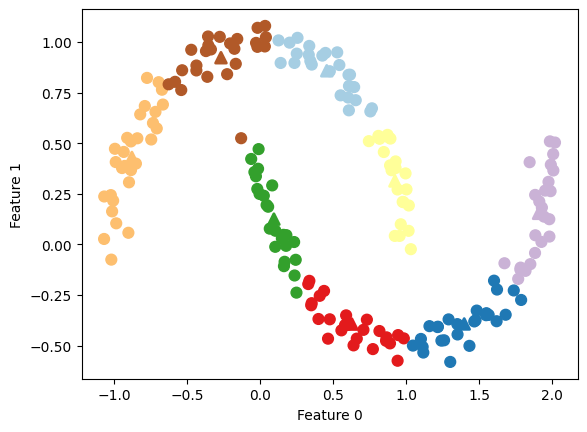

In [219]:
X, y = make_moons(n_samples=200, noise=0.05, random_state=0)
kmeans = KMeans(n_clusters=8, random_state=0)
kmeans.fit(X)
y_pred = kmeans.predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y_pred, s=60, cmap='Paired')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=60,
            marker='^', c=range(kmeans.n_clusters), linewidth=2, cmap='Paired')
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
print("Cluster memberships:\n{}".format(y_pred))

我们使用了 10 个簇中心，也就是说，现在每个点都被分配了 0 到 9 之间的一个数字。我们可以将其看作 10 个分量表示的数据（我们有 10 个新特征），只有表示该点对应的簇中心的那个特征不为 0，其他特征均为 0。(xiaosi改成八个了
利用这个 10 维表示，现在可以用线性模型来划分两个半月形，而利用原始的两个特征是不可能做到这一点的。将到每个簇中心的距离作为特征，还可以得到一种表现力更强的数据表示。可以利用 kmeans 的 transform 方法来完成这一点

In [220]:
distance_features = kmeans.transform(X)
print("Distance feature shape: {}".format(distance_features.shape))
print("Distance features:\n{}".format(distance_features))

Distance feature shape: (200, 8)
Distance features:
[[0.4940159  1.08317585 0.82609106 ... 1.15017588 0.23340263 1.15857711]
 [1.69886137 0.222407   1.60745845 ... 0.60592307 0.98271691 2.294213  ]
 [0.75338346 1.56692821 0.18743538 ... 1.93145038 0.94399739 0.69472236]
 ...
 [0.90880959 1.28043284 0.15604516 ... 1.73811046 0.81205971 1.03099814]
 [0.36300246 1.8926833  0.88381758 ... 1.97647071 1.05774337 0.40371464]
 [1.59059907 0.28194938 1.56825683 ... 0.47226506 0.88166689 2.21163238]]


k 均值是非常流行的聚类算法，因为它不仅相对容易理解和实现，而且运行速度也相对较快。
k 均值可以轻松扩展到大型数据集，scikit-learn 甚至在 MiniBatchKMeans 类中包含了一种更具可扩展性的变体，可以处理非常大的数据集。
k 均值的缺点之一在于，它依赖于随机初始化，也就是说，算法的输出依赖于随机种子。默认情况下，scikit-learn 用 10 种不同的随机初始化将算法运行 10 次，并返回最佳结果。

k 均值还有一个缺点，就是对簇形状的假设的约束性较强，而且还要求指定所要寻找的簇的个数（在现实世界的应用中可能并不知道这个数字）。

凝聚聚类
凝聚聚类（agglomerative clustering）指的是许多基于相同原则构建的聚类算法，这一原则是：算法首先声明每个点是自己的簇，然后合并两个最相似的簇，直到满足某种停止准则为止。
scikit-learn 中实现的停止准则是簇的个数，因此相似的簇被合并，直到仅剩下指定个数的簇。
还有一些链接（linkage）准则，规定如何度量“最相似的簇”。这种度量总是定义在两个现有的簇之间。

scikit-learn 中实现了以下三种选项。
ward
默认选项。ward 挑选两个簇来合并，使得所有簇中的方差增加最小。这通常会得到大小差不多相等的簇。

average
average 链接将簇中所有点之间平均距离最小的两个簇合并。

complete
complete 链接（也称为最大链接）将簇中点之间最大距离最小的两个簇合并。

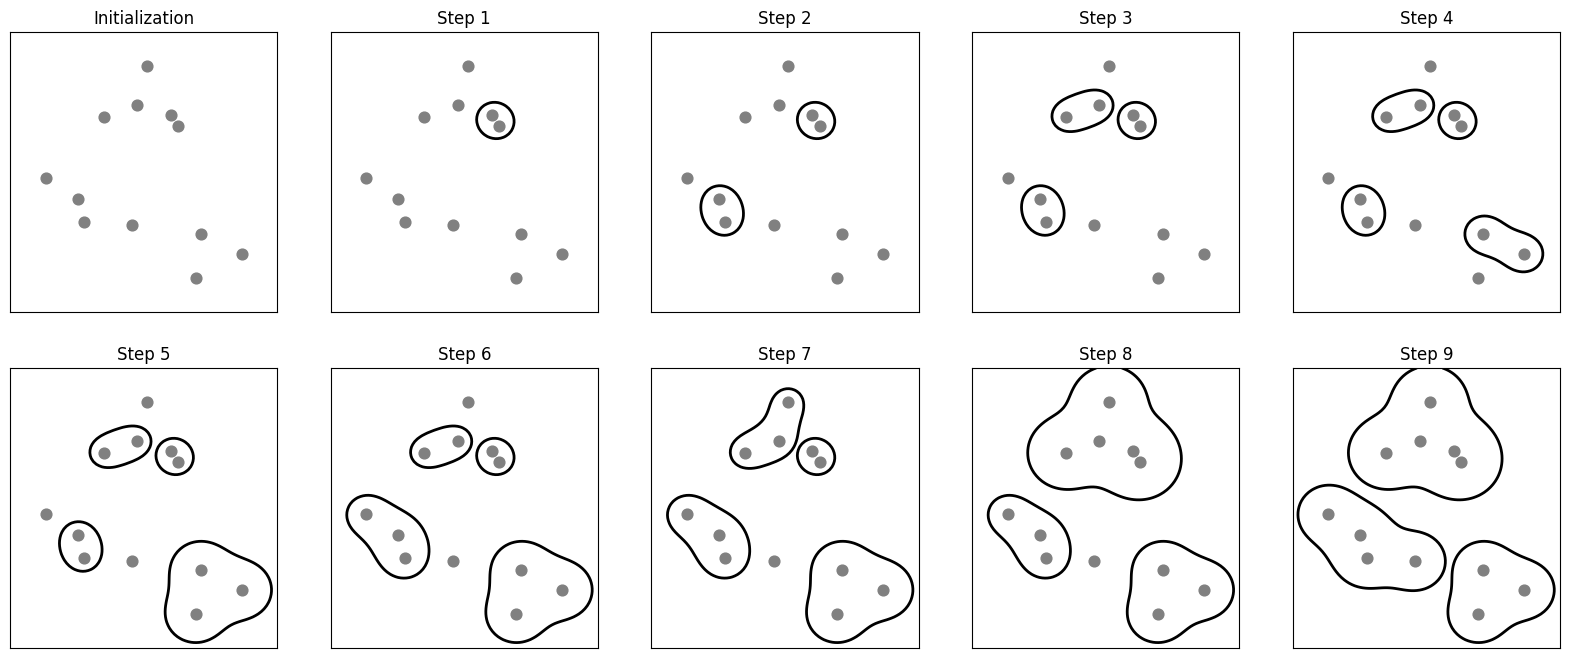

In [221]:
mglearn.plots.plot_agglomerative_algorithm()

我们来看一下凝聚聚类对我们这里使用的简单三簇数据的效果如何。由于算法的工作原理，凝聚算法不能对新数据点做出预测。
因此 AgglomerativeClustering 没有 predict 方法。
为了构造模型并得到训练集上簇的成员关系，可以改用 fit_predict 方法。

Text(0, 0.5, 'Feature 1')

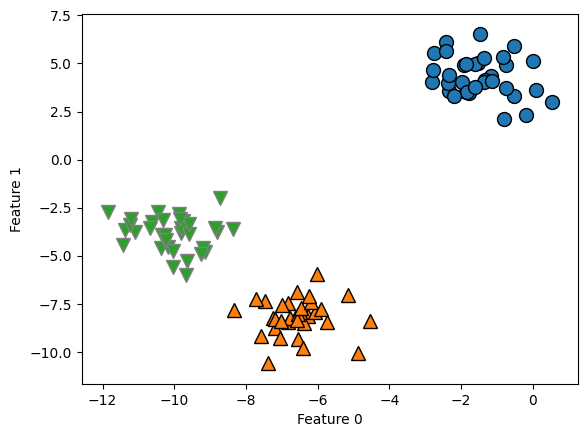

In [222]:
from sklearn.cluster import AgglomerativeClustering

X, y = make_blobs(random_state=1)
agg = AgglomerativeClustering(n_clusters=3)
assignment = agg.fit_predict(X)
mglearn.discrete_scatter(X[:, 0], X[:, 1], assignment)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
# 使用 3 个簇的凝聚聚类的簇分配

算法完美地完成了聚类。虽然凝聚聚类的 scikit-learn 实现需要你指定希望算法找到的簇的个数，但凝聚聚类方法为选择正确的个数提供了一些帮助，我们将在下面讨论。

 层次聚类与树状图
凝聚聚类生成了所谓的层次聚类（hierarchical clustering）。聚类过程迭代进行，每个点都从一个单点簇变为属于最终的某个簇。每个中间步骤都提供了数据的一种聚类（簇的个数也不相同）。有时候，同时查看所有可能的聚类是有帮助的。

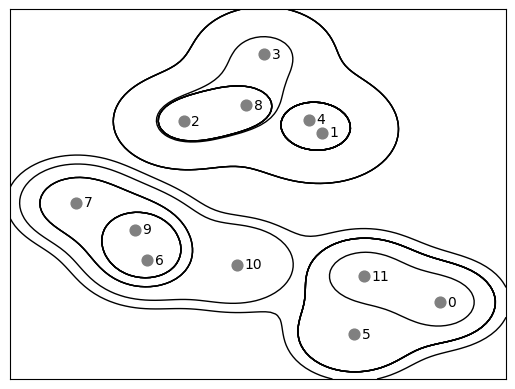

In [223]:
mglearn.plots.plot_agglomerative()

虽然这种可视化为层次聚类提供了非常详细的视图，但它依赖于数据的二维性质，因此不能用于具有两个以上特征的数据集。
但还有另一个将层次聚类可视化的工具，叫作树状图（dendrogram），它可以处理多维数据集。

不幸的是，目前 scikit-learn 没有绘制树状图的功能。但你可以利用 SciPy 轻松生成树状图。
SciPy 的聚类算法接口与 scikit-learn 的聚类算法稍有不同。SciPy 提供了一个函数，接受数据数组 X 并计算出一个链接数组（linkage array），它对层次聚类的相似度进行编码。

然后我们可以将这个链接数组提供给 scipy 的 dendrogram 函数来绘制树状图

Text(0, 0.5, 'Cluster distance')

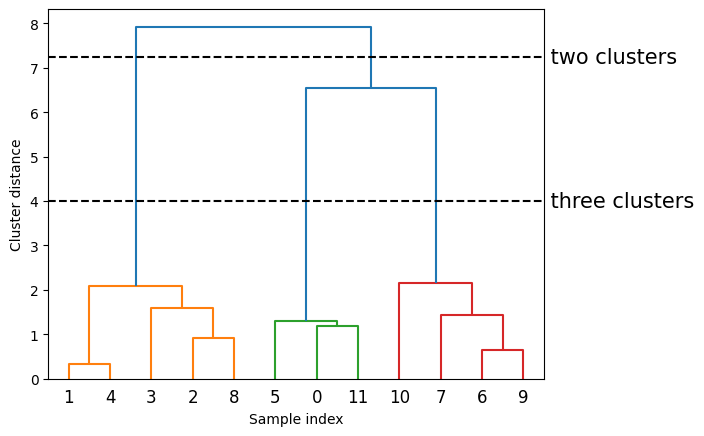

In [224]:
# 从SciPy中导入dendrogram函数和ward聚类函数
from scipy.cluster.hierarchy import dendrogram, ward

X, y = make_blobs(random_state=0, n_samples=12)
# 将ward聚类应用于数据数组X
# SciPy的ward函数返回一个数组，指定执行凝聚聚类时跨越的距离
linkage_array = ward(X)

# 现在为包含簇之间距离的linkage_array绘制树状图
dendrogram(linkage_array)

# 在树中标记划分成两个簇或三个簇的位置
ax = plt.gca()
# plt.gca：获取坐标轴信息

bounds = ax.get_xbound()
# Axes.get_xbound	以递增顺序返回x轴的上下边界。

ax.plot(bounds, [7.25, 7.25], '--', c='k')
ax.plot(bounds, [4, 4], '--', c='k')

ax.text(bounds[1], 7.25, ' two clusters', va='center', fontdict={'size': 15})
ax.text(bounds[1], 4, ' three clusters', va='center', fontdict={'size': 15})

plt.xlabel("Sample index")
plt.ylabel("Cluster distance")


树状图的 y 轴不仅说明凝聚算法中两个簇何时合并，每个分支的长度还表示被合并的簇之间的距离。
在这张树状图中，最长的分支是用标记为“three clusters”（三个簇）的虚线表示的三条线。它们是最长的分支，这表示从三个簇到两个簇的过程中合并了一些距离非常远的点。
我们在图像上方再次看到这一点，将剩下的两个簇合并为一个簇也需要跨越相对较大的距离。

# DBSCAN
另一个非常有用的聚类算法是 DBSCAN（density-based spatial clustering of applications with noise，即“具有噪声的基于密度的空间聚类应用”）。
DBSCAN 的主要优点是它不需要用户先验地设置簇的个数，可以划分具有复杂形状的簇，还可以找出不属于任何簇的点。
DBSCAN 比凝聚聚类和 k 均值稍慢，但仍可以扩展到相对较大的数据集。

In [225]:

from sklearn.cluster import DBSCAN

X, y = make_blobs(random_state=0, n_samples=12)
dbscan = DBSCAN()
clusters = dbscan.fit_predict(X)
print("Cluster memberships:\n{}".format(clusters))

Cluster memberships:
[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]


如你所见，所有数据点都被分配了标签 -1，这代表噪声。这是 eps 和 min_samples 默认参
数设置的结果，对于小型的玩具数据集并没有调节这些参数。min_samples 和 eps 取不同值
时的簇分类如下所示，其可视化结果见图

min_samples: 2 eps: 1.000000  cluster: [-1  0  0 -1  0 -1  1  1  0  1 -1 -1]
min_samples: 2 eps: 1.500000  cluster: [0 1 1 1 1 0 2 2 1 2 2 0]
min_samples: 2 eps: 2.000000  cluster: [0 1 1 1 1 0 0 0 1 0 0 0]
min_samples: 2 eps: 3.000000  cluster: [0 0 0 0 0 0 0 0 0 0 0 0]
min_samples: 3 eps: 1.000000  cluster: [-1  0  0 -1  0 -1  1  1  0  1 -1 -1]
min_samples: 3 eps: 1.500000  cluster: [0 1 1 1 1 0 2 2 1 2 2 0]
min_samples: 3 eps: 2.000000  cluster: [0 1 1 1 1 0 0 0 1 0 0 0]
min_samples: 3 eps: 3.000000  cluster: [0 0 0 0 0 0 0 0 0 0 0 0]
min_samples: 5 eps: 1.000000  cluster: [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
min_samples: 5 eps: 1.500000  cluster: [-1  0  0  0  0 -1 -1 -1  0 -1 -1 -1]
min_samples: 5 eps: 2.000000  cluster: [-1  0  0  0  0 -1 -1 -1  0 -1 -1 -1]
min_samples: 5 eps: 3.000000  cluster: [0 0 0 0 0 0 0 0 0 0 0 0]


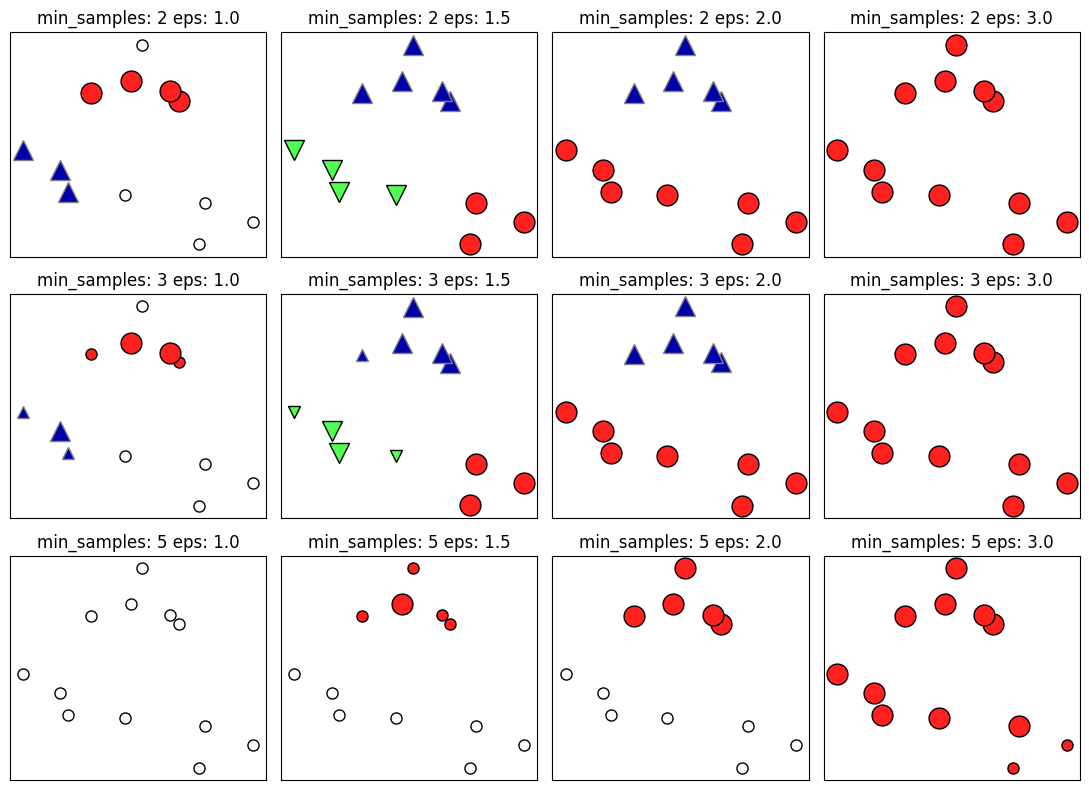

In [226]:
mglearn.plots.plot_dbscan()


在这张图中，属于簇的点是实心的，而噪声点则显示为空心的。核心样本显示为较大的标记，而边界点则显示为较小的标记。
增大 eps（在图中从左到右），更多的点会被包含在一个簇中。这让簇变大，但可能也会导致多个簇合并成一个
增大 min_samples（在图中从上到下），核心点会变得更少，更多的点被标记为噪声。

参数 eps 在某种程度上更加重要，因为它决定了点与点之间“接近”的含义。将 eps 设置
得非常小，意味着没有点是核心样本，可能会导致所有点都被标记为噪声。将 eps 设置得
非常大，可能会导致所有点形成单个簇。

设置 min_samples 主要是为了判断稀疏区域内的点被标记为异常值还是形成自己的簇。如
果增大 min_samples，任何一个包含少于 min_samples 个样本的簇现在将被标记为噪声。

虽然 DBSCAN 不需要显式地设置簇的个数，但设置 eps 可以隐式地控制找到的簇的个数。

使用 StandardScaler 或 MinMaxScaler 对数据进行缩放之后，有时会更容易找到 eps 的较好取值，因为使用这些缩放技术将确保所有特征具有相似的范围。

In [227]:
# 8 展示了在 two_moons 数据集上运行 DBSCAN 的结果。利用默认设置，算法找到了
# 两个半圆形并将其分开：

Text(0, 0.5, 'Feature 1')

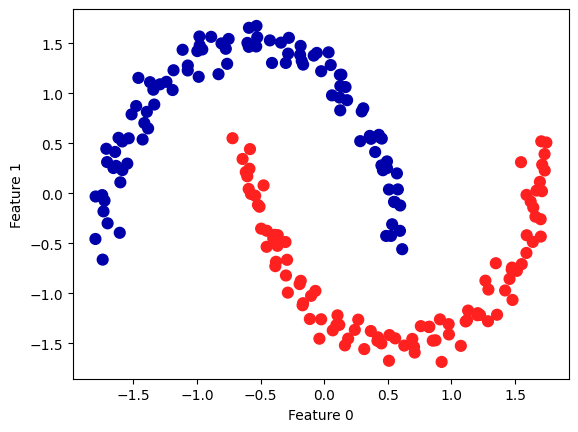

In [228]:
X, y = make_moons(n_samples=200, noise=0.05, random_state=0)
# 将数据缩放成平均值为0、方差为1
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)
dbscan = DBSCAN()
clusters = dbscan.fit_predict(X_scaled)
# 绘制簇分配
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters, cmap=mglearn.cm2, s=60)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

# 聚类算法的对比与评估
在应用聚类算法时，其挑战之一就是很难评估一个算法的效果好坏，也很难比较不同算法的结果。
在讨论完 k 均值、凝聚聚类和 DBSCAN 背后的算法之后，下面我们将在一些现实世界的数据集上比较它们

##  用真实值评估聚类
有一些指标可用于评估聚类算法相对于真实聚类的结果，其中最重要的是调整 rand 指数
（adjusted rand index，ARI）和归一化互信息（normalized mutual information，NMI），二者
都给出了定量的度量，其最佳值为 1，0 表示不相关的聚类（虽然 ARI 可以取负值）。
下面我们使用 ARI 来比较 k 均值、凝聚聚类和 DBSCAN 算法。为了对比，我们还添加了
将点随机分配到两个簇中的图像

In [229]:
# 使用 ARI 来比较 k 均值、凝聚聚类和 DBSCAN 算法。为了对比，我们还添加了
# 将点随机分配到两个簇中的图像

C:\Users\win10\.conda\envs\pythonProject1\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\win10\.conda\envs\pythonProject1\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Text(0.5, 1.0, 'DBSCAN - ARI: 1.00')

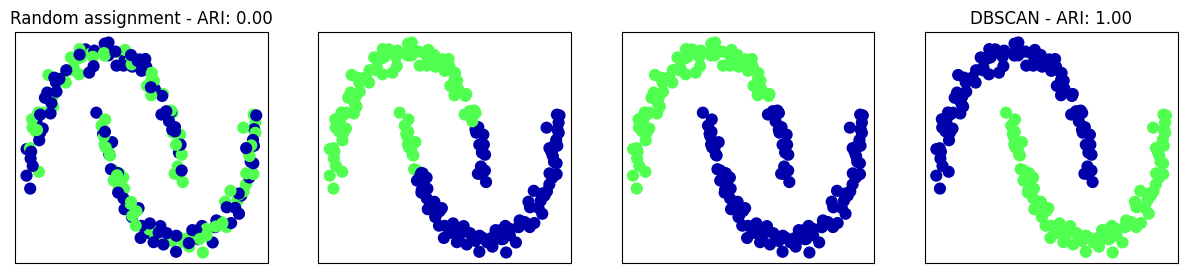

In [230]:
from sklearn.metrics.cluster import adjusted_rand_score

X, y = make_moons(n_samples=200, noise=0.05, random_state=0)

# 将数据缩放成平均值为0、方差为1
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

fig, axes = plt.subplots(1, 4, figsize=(15, 3),
                         subplot_kw={'xticks': (), 'yticks': ()})

# 列出要使用的算法
algorithms = [KMeans(n_clusters=2),
              AgglomerativeClustering(n_clusters=2),
              DBSCAN()]

# 创建一个随机的簇分配，作为参考
random_state = np.random.RandomState(seed=0)
random_clusters = random_state.randint(low=0, high=2, size=len(X))

# 绘制随机分配
axes[0].scatter(X_scaled[:, 0],
                X_scaled[:, 1],
                c=random_clusters,
                cmap=mglearn.cm3, s=60)
axes[0].set_title("Random assignment - ARI: {:.2f}".format
                  (adjusted_rand_score(y, random_clusters)))
for ax, algorithm in zip(axes[1:], algorithms):
    # 绘制簇分配和簇中心
    clusters = algorithm.fit_predict(X_scaled)
    ax.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters,
               cmap=mglearn.cm3, s=60)

ax.set_title("{} - ARI: {:.2f}".format(algorithm.__class__.__name__,
                                       adjusted_rand_score(y, clusters)))

用这种方式评估聚类时，一个常见的错误是使用 accuracy_score 而不是 adjusted_rand_
score、normalized_mutual_info_score 或其他聚类指标。使用精度的问题在于，它要求分
配的簇标签与真实值完全匹配。但簇标签本身毫无意义——唯一重要的是哪些点位于同一
个簇中。

In [231]:
from sklearn.metrics import accuracy_score

# 这两种点标签对应于相同的聚类
clusters1 = [0, 0, 1, 1, 0]
clusters2 = [1, 1, 0, 0, 1]
# 精度为0，因为二者标签完全不同
print("Accuracy: {:.2f}".format(accuracy_score(clusters1, clusters2)))
# 调整rand分数为1，因为二者聚类完全相同
print("ARI: {:.2f}".format(adjusted_rand_score(clusters1, clusters2)))

Accuracy: 0.00
ARI: 1.00


在没有真实值的情况下评估聚类

我们刚刚展示了一种评估聚类算法的方法，但在实践中，使用诸如 ARI 之类的指标有一个很大的问题。在应用聚类算法时，通常没有真实值来比较结果。
如果我们知道了数据的正确聚类，那么可以使用这一信息构建一个监督模型（比如分类器）。因此，使用类似 ARI和 NMI 的指标通常仅有助于开发算法，但对评估应用是否成功没有帮助。

有一些聚类的评分指标不需要真实值，比如轮廓系数（silhouette coeffcient）。但它们在实践中的效果并不好。轮廓分数计算一个簇的紧致度，其值越大越好，最高分数为 1。虽然紧致的簇很好，但紧致度不允许复杂的形状。
下面是一个例子，利用轮廓分数在 two_moons 数据集上比较 k 均值、凝聚聚类和 DBSCAN

C:\Users\win10\.conda\envs\pythonProject1\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\win10\.conda\envs\pythonProject1\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


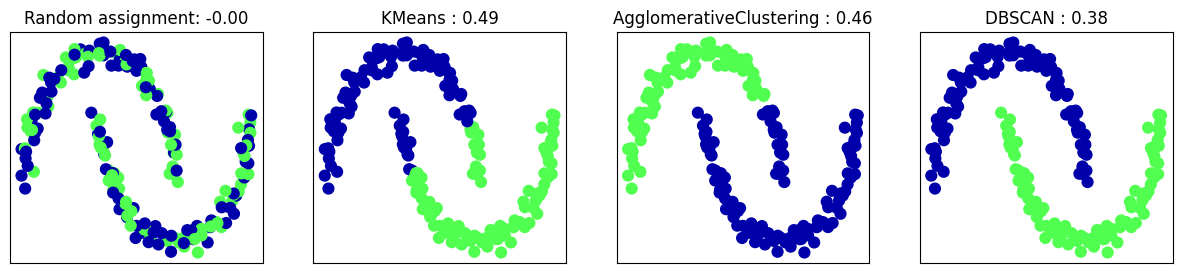

In [232]:
from sklearn.metrics.cluster import silhouette_score

X, y = make_moons(n_samples=200, noise=0.05, random_state=0)

# 将数据缩放成平均值为0、方差为1
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

fig, axes = plt.subplots(1, 4, figsize=(15, 3),
                         subplot_kw={'xticks': (), 'yticks': ()})

# 创建一个随机的簇分配，作为参考
random_state = np.random.RandomState(seed=0)
random_clusters = random_state.randint(low=0, high=2, size=len(X))

# 绘制随机分配
axes[0].scatter(X_scaled[:, 0], X_scaled[:, 1], c=random_clusters,
                cmap=mglearn.cm3, s=60)
axes[0].set_title("Random assignment: {:.2f}".format(
    silhouette_score(X_scaled, random_clusters)))

algorithms = [KMeans(n_clusters=2), AgglomerativeClustering(n_clusters=2),
              DBSCAN()]

for ax, algorithm in zip(axes[1:], algorithms):
    clusters = algorithm.fit_predict(X_scaled)
    # 绘制簇分配和簇中心
    ax.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters,
               cmap=mglearn.cm3,
               s=60)
    ax.set_title("{} : {:.2f}".format(algorithm.__class__.__name__,
                                      silhouette_score(X_scaled, clusters)))

 # 在人脸数据集上比较算法
我们将 k 均值、DBSCAN 和凝聚聚类算法应用于 Wild 数据集中的 Labeled Faces，并查
看它们是否找到了有趣的结构。我们将使用数据的特征脸表示，它由包含 100 个成分的
PCA(whiten=True) 生成

In [233]:
# 从lfw数据中提取特征脸，并对数据进行变换
from sklearn.decomposition import PCA

pca = PCA(n_components=100, whiten=True, random_state=0)
pca.fit_transform(X_people)
X_pca = pca.transform(X_people)

用 DBSCAN 分析人脸数据集。我们首先应用刚刚讨论过的 DBSCAN

In [239]:
# 应用默认参数的DBSCAN
dbscan = DBSCAN(min_samples=3, eps=15)
labels = dbscan.fit_predict(X_pca)
print("Unique labels: {}".format(np.unique(labels)))

Unique labels: [-1  0]


使用更大的 eps（其值为 15），我们只得到了单一簇和噪声点。我们可以利用这一结果找出
“噪声”相对于其他数据的形状。为了进一步理解发生的事情，我们查看有多少点是噪声，
有多少点在簇内：

In [235]:
# 计算所有簇中的点数和噪声中的点数。
# bincount不允许负值，所以我们需要加1。
# 结果中的第一个数字对应于噪声点。
print("Number of points per cluster: {}".format(np.bincount(labels + 1)))

Number of points per cluster: [  29 1456]


In [236]:
# noise = X_people[labels==-1]
# fig, axes = plt.subplots(3, 9, subplot_kw={'xticks': (), 'yticks': ()},
#                          figsize=(12, 5))
# for image, ax in zip(noise, axes.ravel()):
#     ax.imshow(image.reshape(image_shape), vmin=0, vmax=1)
# 画不出来

如果我们想要找到更有趣的簇，而不是一个非常大的簇，那么需要将 eps 设置得更小，取
值在 15 和 0.5（默认值）之间。我们来看一下 eps 不同取值对应的结果：

In [237]:
for eps in [1, 3, 5, 7, 9, 11, 13]:
    print("\neps={}".format(eps))
    dbscan = DBSCAN(eps=eps, min_samples=3)
    labels = dbscan.fit_predict(X_pca)
    print("Clusters present: {}".format(np.unique(labels)))
    print("Cluster sizes: {}".format(np.bincount(labels + 1)))


eps=1
Clusters present: [-1]
Cluster sizes: [1485]

eps=3
Clusters present: [-1]
Cluster sizes: [1485]

eps=5
Clusters present: [-1]
Cluster sizes: [1485]

eps=7
Clusters present: [-1  0  1  2  3  4]
Cluster sizes: [1438   27   10    3    4    3]

eps=9
Clusters present: [-1  0]
Cluster sizes: [894 591]

eps=11
Clusters present: [-1  0]
Cluster sizes: [ 312 1173]

eps=13
Clusters present: [-1  0]
Cluster sizes: [  96 1389]


eps=7 的结果看起来最有趣，它有许多较小的簇。我们可以通过将 13 个较小的簇中的点全
部可视化来深入研究这一聚类

In [238]:
# dbscan = DBSCAN(min_samples=3, eps=7)
# labels = dbscan.fit_predict(X_pca)
# for cluster in range(max(labels) + 1):
#     mask = labels == cluster
#     n_images = np.sum(mask)
#     fig, axes = plt.subplots(1, n_images, figsize=(n_images * 1.5, 4),
#                              subplot_kw={'xticks': (), 'yticks': ()})
# for image, label, ax in zip(X_people[mask], y_people[mask], axes):
#     ax.imshow(image.reshape(image_shape), vmin=0, vmax=1)
#     ax.set_title(people.target_names[label].split()[-1])

# 估计器接口小结
我们简要回顾一下第 2 章和第 3 章介绍的 API。scikit-learn 中的所有算法——无论是预处理、监督学习还是无监督学习算法——都被实现为类。这些类在 scikit-learn中叫作估计器（estimator）。
为了应用算法，你首先需要将特定类的对象实例化：
In[87]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

估计器类包含算法，也保存了利用算法从数据中学到的模型。

在构建模型对象时，你应该设置模型的所有参数。这些参数包括正则化、复杂度控制、要找到的簇的数量，等等。所有估计器都有 fit 方法，用于构建模型。fit 方法要求第一个参数总是数据 X，用一个 NumPy 数组或 SciPy 稀疏矩阵表示，其中每一行代表一个数据点。
数据 X 总被假定为具有连续值（浮点数）的 NumPy 数组或 SciPy 稀疏矩阵。监督算法还需要有一个 y 参数，它是一维 NumPy 数组，包含回归或分类的目标值（即已知的输出标签或响应）。

在 scikit-learn 中，应用学到的模型主要有两种方法。要想创建一个新输出形式（比如 y）的预测，可以用 predict 方法。要想创建输入数据 X 的一种新表示，可以用transform 方法。表 3-1 汇总了 predict 方法和 transform 方法的使用场景。